In [350]:
import pandas as pd
import numpy as np
import glob

# 서울시 공공자전거 대여이력 정보 데이터

# bike1 = pd.read_csv('../../data/bike/2306.csv', encoding='cp949')
# bike2 = pd.read_csv('../../data/bike/2307.csv', encoding='cp949')
# bike3 = pd.read_csv('../../data/bike/2308.csv', encoding='cp949')
# bike4 = pd.read_csv('../../data/bike/2309.csv', encoding='cp949')
# bike5 = pd.read_csv('../../data/bike/2310.csv', encoding='cp949')
# bike6 = pd.read_csv('../../data/bike/2311.csv', encoding='cp949')
# bike7 = pd.read_csv('../../data/bike/2312.csv', encoding='cp949')
# bike8 = pd.read_csv('../../data/bike/2401.csv', encoding='cp949')
# bike9 = pd.read_csv('../../data/bike/2402.csv', encoding='cp949')
# bike10 = pd.read_csv('../../data/bike/2403.csv', encoding='cp949')
# bike11 = pd.read_csv('../../data/bike/2404.csv', encoding='cp949')
# bike12 = pd.read_csv('../../data/bike/2405.csv', encoding='cp949')
# bike13 = pd.read_csv('../../data/bike/2406.csv', encoding='cp949')

In [ ]:
# combined_df = pd.concat([bike1, bike2, bike3, bike4, bike5, bike6, bike7, bike8, bike9, bike10, bike11, bike12, bike13], ignore_index=True)

In [186]:
# file_paths = glob.glob('../../data/bike/*.csv')
# dfs = [pd.read_csv(file, encoding='cp949') for file in file_paths]
# bike_data = pd.concat(dfs, ignore_index=True)

In [188]:
# combined_df.to_csv('bike.csv')
# combined_df = pd.read_csv('bike.csv')

### bike1-13의 불필요한 컬럼 삭제, 컬럼명 통일, 합쳐서 하나의 데이터셋으로 만들기 
> - 24년과 23년 데이터는 컬럼의 개수가 다르다

In [189]:
# combined_df.drop(['자전거번호', '대여 대여소번호', '대여 대여소명', '반납일시', '반납대여소번호', '반납거치대', '대여대여소ID', '반납대여소ID'], axis=1, inplace=True)
# combined_df.drop(['자전거구분', '반납대여소명', '대여거치대', '이용거리(M)', '이용시간(분)', '이용자종류'], axis=1, inplace=True)
# combined_df

In [190]:
# bike = combined_df.dropna()
# bike = bike1[bike1['이용시간(분)'] > 5]
# bike = bike[bike['이용자종류'] == '내국인']

In [192]:
# bike['대여일시'] = pd.to_datetime(bike['대여일시'], errors='coerce')
# bike

In [193]:
# bike = bike.dropna(subset=['대여일시'])
# bike

In [194]:
# bike['대여일자'] = pd.to_datetime(bike['대여일시'])
# bike['대여일자'] = bike['대여일자'].dt.strftime('%Y-%m-%d-%H')
# bike

In [195]:
# bike.drop(['대여일시'], axis=1, inplace=True)
# bike

## test data 생성

In [364]:
def clean_bike_data(df):
    df.drop(['자전거번호', '대여 대여소번호', '대여 대여소명', '대여거치대', '반납일시', '반납대여소번호', '반납거치대', '대여대여소ID',
             '반납대여소ID', '반납대여소명', '이용거리(M)', '이용시간(분)'], axis=1, inplace=True)
    
    df = df.dropna()
    
    df['대여일시'] = pd.to_datetime(df['대여일시'], errors='coerce')
    
    df = df.dropna(subset=['대여일시'])
    
    df['대여일자'] = pd.to_datetime(df['대여일시'])
    df['대여일자'] = df['대여일자'].dt.strftime('%Y-%m-%d-%H')
    
    df.drop(['대여일시'], axis=1, inplace=True)
    return df

In [365]:
pred_bike = pd.read_csv('../../data/bike/predict/202304.csv', encoding='cp949')
pred_bike_1 = clean_bike_data(pred_bike)

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1765325302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['대여일시'] = pd.to_datetime(df['대여일시'], errors='coerce')


### weather 데이터의 불필요한 컬럼은 삭제, 컬럼명을 bike 데이터와 통일, 대여일자를 기준으로 병합

In [332]:
def clean_weather_data(df):
    df.drop(['지점', '지점명'], axis=1, inplace=True)
    df = df.rename(columns={'일시': '대여일자'})
    
    df['대여일자'] = pd.to_datetime(df['대여일자'])
    df['대여일자'] = df['대여일자'].dt.strftime('%Y-%m-%d-%H')
    
    df_sorted = df.sort_values(by='대여일자')
    return df_sorted

In [327]:
weather = pd.read_csv('../../data/bike/weather/weather.csv', encoding='cp949')
dust1 = pd.read_csv('../../data/bike/weather/황사2306.csv', encoding='cp949')
dust2 = pd.read_csv('../../data/bike/weather/황사2406.csv', encoding='cp949')

weather = clean_weather_data(weather)
dust_1 = clean_weather_data(dust_1)
dust_2 = clean_weather_data(dust_2)

In [329]:
dust = pd.concat([dust1, dust2], ignore_index=True)

dust['대여일자'] = pd.to_datetime(dust['대여일자'])
dust['대여일자'] = dust['대여일자'].dt.strftime('%Y-%m-%d-%H')
dust_sorted = dust.sort_values(by='대여일자')

In [333]:
weather_2304 = pd.read_csv('../../data/bike/predict/weather2304.csv', encoding='cp949')
dust_2304 = pd.read_csv('../../data/bike/predict/dust202304.csv', encoding='cp949')

test_weather_1 = clean_weather_data(weather_2304)
test_dust_1 = clean_weather_data(dust_2304)

In [334]:
total_data = pd.merge(weather_1, dust_1, on='대여일자')
total_data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-04-01-00    12.5      NaN      1.4     47     NaN          0   
1    2023-04-01-01    11.7      NaN      1.1     50     NaN          0   
2    2023-04-01-02    11.0      NaN      1.6     55     NaN          5   
3    2023-04-01-03    10.5      NaN      1.0     56     NaN          0   
4    2023-04-01-04    10.4      NaN      1.3     58     NaN          0   
..             ...     ...      ...      ...    ...     ...        ...   
689  2023-04-30-19    14.3      0.0      3.0     74     NaN         10   
690  2023-04-30-20    13.7      0.0      3.0     80     NaN         10   
691  2023-04-30-21    13.3      0.1      3.2     83     NaN         10   
692  2023-04-30-22    12.8      0.0      1.8     81     NaN          2   
693  2023-04-30-23    12.1      NaN      2.7     86     NaN          6   

     지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)  
0         8.0                 56  
1         7.4                 63  
2         6.9                 81  
3         6.4                 76  
4         6.2                 79  
..        ...                ...  
689      14.9                 76  
690      13.8                 68  
691      13.3                 65  
692      12.1                 55  
693      11.6                 52  

[694 rows x 9 columns]

In [392]:
def process_bike_data(pred_bike_1):
    # 생년과 성별에서 '\N' 값을 NaN으로 변환
    pred_bike_1['생년'].replace('\\N', pd.NA, inplace=True)
    pred_bike_1['성별'].replace('\\N', pd.NA, inplace=True)

    # 생년과 성별의 NaN 값을 가진 행을 별도로 저장하고 기존 데이터프레임에서 제거
    NaN_bike = pred_bike_1[pred_bike_1[['생년', '성별']].isna().any(axis=1)]
    pred_bike_5 = pred_bike_1.dropna(subset=['생년', '성별'])

    # 성별 컬럼에서 'M'과 'F' 외의 값은 '기타'로 처리
    pred_bike_5['성별'] = pred_bike_5['성별'].replace({'M': '남성', 'F': '여성'}).fillna('기타')

    # 생년을 9년 단위로 그룹화
    bins = list(range(1900, 2025, 10))
    labels = [f'{year}~{year+9}' for year in bins[:-1]]
    pred_bike_5['생년대'] = pd.cut(pred_bike_5['생년'].astype(float), bins=bins, labels=labels, right=False)

    # 생년을 1920~2020 사이 값으로 필터링
    pred_bike_5 = pred_bike_5[pred_bike_5['생년'].astype(float).between(1920, 2020)]

    # 성별별 대여일자별 집계
    gender_grouped = pred_bike_5.groupby(['대여일자', '성별']).size().unstack(fill_value=0).reset_index()

    # 성별 이름 통일
    gender_grouped = gender_grouped.rename(columns={'F': '여성', 'M': '남성'})
    if 'f' in gender_grouped.columns and 'm' in gender_grouped.columns:
        gender_grouped['남성'] = gender_grouped['남성'] + gender_grouped['f']
        gender_grouped['여성'] = gender_grouped['여성'] + gender_grouped['m']
        gender_grouped.drop(columns=['f', 'm'], inplace=True)

    # 대여일자별 이용자 유형 및 생년대별 집계
    bike_sum = pred_bike_5.groupby('대여일자').size().reset_index(name='대여')
    user_type_grouped = pred_bike_5.groupby(['대여일자', '이용자종류']).size().unstack(fill_value=0).reset_index()
    birth_grouped = pred_bike_5.groupby(['대여일자', '생년대']).size().unstack(fill_value=0).reset_index()

    # 집계된 데이터를 병합
    merged_df = pd.merge(gender_grouped, user_type_grouped, on='대여일자', how='outer')
    merged_df = pd.merge(merged_df, birth_grouped, on='대여일자', how='outer')
    merged_df = pd.merge(merged_df, bike_sum, on='대여일자', how='outer')

    # 불필요한 열 삭제
    if '1900~1909' in merged_df.columns and '1910~1919' in merged_df.columns:
        merged_df.drop(['1900~1909', '1910~1919'], axis=1, inplace=True)

    # NaN 값을 가진 데이터프레임의 집계
    NaN_sum = NaN_bike.groupby('대여일자').size().reset_index(name='기타회원')

    # 날짜 형식 맞추기
    merged_df['대여일자'] = pd.to_datetime(merged_df['대여일자'])
    NaN_sum['대여일자'] = pd.to_datetime(NaN_sum['대여일자'])

    # 최종 데이터 병합
    final_df = pd.merge(merged_df, NaN_sum, on='대여일자', how='outer')

    return final_df

In [393]:
pred_bike_2 = process_bike_data(pred_bike_1)
pred_bike_2

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/2827631970.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pred_bike_1['생년'].replace('\\N', pd.NA, inplace=True)
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/2827631970.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

대여일자    남성    여성   내국인  비회원  1920~1929  1930~1939  \
0   2023-04-01 00:00:00  1882   658  2540    0          1          1   
1   2023-04-01 01:00:00  1472   433  1905    0          0          0   
2   2023-04-01 02:00:00   925   208  1133    0          0          4   
3   2023-04-01 03:00:00   606   132   738    0          0          0   
4   2023-04-01 04:00:00   446    93   539    0          0          0   
..                  ...   ...   ...   ...  ...        ...        ...   
715 2023-04-30 19:00:00  2121  1337  3458    0          0          2   
716 2023-04-30 20:00:00  1043   504  1547    0          0          0   
717 2023-04-30 21:00:00   911   452  1363    0          0          1   
718 2023-04-30 22:00:00  1183   551  1734    0          0          0   
719 2023-04-30 23:00:00  1037   404  1441    0          0          0   

     1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0            1         39        200        226        333       1043   
1            6         38        172        222        238        706   
2            3         35        140        120        139        390   
3            2         29        117         98         79        232   
4            2         21        100         95         62        165   
..         ...        ...        ...        ...        ...        ...   
715          4         43        219        403        575       1406   
716          2         21         99        215        268        575   
717          1         19         68        180        215        531   
718          2         11         89        167        239        702   
719          7         11         76        126        174        620   

     2000~2009  2010~2019    대여  기타회원  
0          696          0  2540  1561  
1          523          0  1905  1222  
2          301          0  1133   741  
3          179          2   738   454  
4           94          0   539   291  
..         ...        ...   ...   ...  
715        805          1  3458  1840  
716        367          0  1547   769  
717        348          0  1363   665  
718        524          0  1734   933  
719        427          0  1441   854  

[720 rows x 17 columns]

In [394]:
def clean_bike_data(df):
    df['대여일자'] = pd.to_datetime(df['대여일자'])
    df['대여일자'] = df['대여일자'].dt.strftime('%Y-%m-%d-%H')
    
    df['기타회원'] = df['비회원'] + df['기타회원']
    df['대여'] = df['대여'] - df['비회원']
    
    df_cleaned = df.drop(columns=['비회원'])
    return df_cleaned

In [447]:
bike_grouped = clean_bike_data(pred_bike_2)

In [396]:
# 날씨, 자전거 데이터 병합
total_data['대여일자'] = total_data['대여일자'].astype(str)
bike_grouped['대여일자'] = bike_grouped['대여일자'].astype(str)

total_data_merged = pd.merge(total_data, bike_grouped, on='대여일자', how='inner')
total_data_merged

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-04-01-00    12.5      NaN      1.4     47     NaN          0   
1    2023-04-01-01    11.7      NaN      1.1     50     NaN          0   
2    2023-04-01-02    11.0      NaN      1.6     55     NaN          5   
3    2023-04-01-03    10.5      NaN      1.0     56     NaN          0   
4    2023-04-01-04    10.4      NaN      1.3     58     NaN          0   
..             ...     ...      ...      ...    ...     ...        ...   
689  2023-04-30-19    14.3      0.0      3.0     74     NaN         10   
690  2023-04-30-20    13.7      0.0      3.0     80     NaN         10   
691  2023-04-30-21    13.3      0.1      3.2     83     NaN         10   
692  2023-04-30-22    12.8      0.0      1.8     81     NaN          2   
693  2023-04-30-23    12.1      NaN      2.7     86     NaN          6   

     지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         8.0                 56  1882   658  2540          1          1   
1         7.4                 63  1472   433  1905          0          0   
2         6.9                 81   925   208  1133          0          4   
3         6.4                 76   606   132   738          0          0   
4         6.2                 79   446    93   539          0          0   
..        ...                ...   ...   ...   ...        ...        ...   
689      14.9                 76  2121  1337  3458          0          2   
690      13.8                 68  1043   504  1547          0          0   
691      13.3                 65   911   452  1363          0          1   
692      12.1                 55  1183   551  1734          0          0   
693      11.6                 52  1037   404  1441          0          0   

     1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0            1         39        200        226        333       1043   
1            6         38        172        222        238        706   
2            3         35        140        120        139        390   
3            2         29        117         98         79        232   
4            2         21        100         95         62        165   
..         ...        ...        ...        ...        ...        ...   
689          4         43        219        403        575       1406   
690          2         21         99        215        268        575   
691          1         19         68        180        215        531   
692          2         11         89        167        239        702   
693          7         11         76        126        174        620   

     2000~2009  2010~2019    대여  기타회원  
0          696          0  2540  1561  
1          523          0  1905  1222  
2          301          0  1133   741  
3          179          2   738   454  
4           94          0   539   291  
..         ...        ...   ...   ...  
689        805          1  3458  1840  
690        367          0  1547   769  
691        348          0  1363   665  
692        524          0  1734   933  
693        427          0  1441   854  

[694 rows x 24 columns]

In [397]:
total_data = total_data_merged

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-04-01-00    12.5      NaN      1.4     47     NaN          0   
1    2023-04-01-01    11.7      NaN      1.1     50     NaN          0   
2    2023-04-01-02    11.0      NaN      1.6     55     NaN          5   
3    2023-04-01-03    10.5      NaN      1.0     56     NaN          0   
4    2023-04-01-04    10.4      NaN      1.3     58     NaN          0   
..             ...     ...      ...      ...    ...     ...        ...   
689  2023-04-30-19    14.3      0.0      3.0     74     NaN         10   
690  2023-04-30-20    13.7      0.0      3.0     80     NaN         10   
691  2023-04-30-21    13.3      0.1      3.2     83     NaN         10   
692  2023-04-30-22    12.8      0.0      1.8     81     NaN          2   
693  2023-04-30-23    12.1      NaN      2.7     86     NaN          6   

     지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         8.0                 56  1882   658  2540          1          1   
1         7.4                 63  1472   433  1905          0          0   
2         6.9                 81   925   208  1133          0          4   
3         6.4                 76   606   132   738          0          0   
4         6.2                 79   446    93   539          0          0   
..        ...                ...   ...   ...   ...        ...        ...   
689      14.9                 76  2121  1337  3458          0          2   
690      13.8                 68  1043   504  1547          0          0   
691      13.3                 65   911   452  1363          0          1   
692      12.1                 55  1183   551  1734          0          0   
693      11.6                 52  1037   404  1441          0          0   

     1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0            1         39        200        226        333       1043   
1            6         38        172        222        238        706   
2            3         35        140        120        139        390   
3            2         29        117         98         79        232   
4            2         21        100         95         62        165   
..         ...        ...        ...        ...        ...        ...   
689          4         43        219        403        575       1406   
690          2         21         99        215        268        575   
691          1         19         68        180        215        531   
692          2         11         89        167        239        702   
693          7         11         76        126        174        620   

     2000~2009  2010~2019    대여  기타회원  
0          696          0  2540  1561  
1          523          0  1905  1222  
2          301          0  1133   741  
3          179          2   738   454  
4           94          0   539   291  
..         ...        ...   ...   ...  
689        805          1  3458  1840  
690        367          0  1547   769  
691        348          0  1363   665  
692        524          0  1734   933  
693        427          0  1441   854  

[694 rows x 24 columns]

In [ ]:
s

## 학습용, 분석 데이터 불러오기

In [453]:
total_data = pd.read_csv('total_final_data')
total_data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0     2023-06-01-00    20.7      NaN      2.0     66     NaN         10   
1     2023-06-01-01    20.5      NaN      1.0     67     NaN         10   
2     2023-06-01-02    20.4      NaN      1.1     69     NaN         10   
3     2023-06-01-03    20.1      NaN      1.2     70     NaN         10   
4     2023-06-01-04    20.2      NaN      1.4     70     NaN         10   
...             ...     ...      ...      ...    ...     ...        ...   
8984  2024-06-30-19    24.7      NaN      2.6     81     NaN          1   
8985  2024-06-30-20    24.5      NaN      3.3     82     NaN          3   
8986  2024-06-30-21    23.8      NaN      2.1     83     NaN          3   
8987  2024-06-30-22    23.1      NaN      2.9     85     NaN          6   
8988  2024-06-30-23    22.8      NaN      1.3     86     NaN          4   

      지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         19.2                 17  1824   671  2495          0          2   
1         19.2                 24  1214   345  1559          0          3   
2         18.9                 27   795   200   995          0          3   
3         18.7                 30   479   104   583          0          0   
4         18.6                 34   468   144   612          0          1   
...        ...                ...   ...   ...   ...        ...        ...   
8984      23.8                 26  3636  2294  5929          0          0   
8985      23.0                 22  3399  2192  5591          0          2   
8986      21.8                 32  3239  1857  5096          0          0   
8987      21.3                 24  2712  1322  4034          0          0   
8988      21.4                 31  1837   728  2565          0          0   

      1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0             3         33        193        266        371        996   
1             4         39        193        199        191        578   
2             2         30        139        141        148        322   
3             0         17         98        107         86        188   
4             2         29        131        126        104        151   
...         ...        ...        ...        ...        ...        ...   
8984         10         88        404        799       1195       2200   
8985          4         73        310        667       1056       2203   
8986          6         44        283        511        832       2045   
8987          2         38        195        345        517       1554   
8988          5         26        133        233        311        924   

      2000~2009  2010~2019    대여  기타회원  
0           629          2  2495  1371  
1           352          0  1559   890  
2           209          1   995   587  
3            86          1   583   352  
4            68          0   612   295  
...         ...        ...   ...   ...  
8984       1198         35  5929  2736  
8985       1255         21  5591  2617  
8986       1361         13  5096  2269  
8987       1370         12  4034  1781  
8988        928          5  2565  1243  

[8989 rows x 24 columns]

In [454]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import koreanize_matplotlib
import seaborn as sns

## feature engineering

In [457]:
# 0: 월요일
# 1: 화요일
# 2: 수요일
# 3: 목요일
# 4: 금요일
# 5: 토요일
# 6: 일요일

In [455]:
def process_total_data(total_data):
    total_data = total_data.fillna(0)
    total_data['대여일자'] = pd.to_datetime(total_data['대여일자'])

    # 년, 월, 일, 시간, 요일 컬럼 생성
    total_data['년'] = total_data['대여일자'].dt.year
    total_data['월'] = total_data['대여일자'].dt.month
    total_data['일'] = total_data['대여일자'].dt.day
    total_data['시간'] = total_data['대여일자'].dt.hour
    total_data["요일"] = total_data["대여일자"].dt.dayofweek

    return total_data

In [456]:
data = process_total_data(total_data)

In [458]:
def categorize_cloudiness(row):
    if 0 <= row <= 2:
        return 0 # 맑음
    elif 3 <= row <= 5:
        return 1 # 대체로 맑음
    elif 6 <= row <= 8:
        return 2 # 대체로 흐림
    elif 9 <= row <= 10:
        return 3 # 흐림
    else:
        return 4  # 알 수 없음

# 구름 컬럼 생성
data['구름'] = data['전운량(10분위)'].apply(categorize_cloudiness)
data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-06-01 00:00:00    20.7      0.0      2.0     66     0.0         10   
1    2023-06-01 01:00:00    20.5      0.0      1.0     67     0.0         10   
2    2023-06-01 02:00:00    20.4      0.0      1.1     69     0.0         10   
3    2023-06-01 03:00:00    20.1      0.0      1.2     70     0.0         10   
4    2023-06-01 04:00:00    20.2      0.0      1.4     70     0.0         10   
...                  ...     ...      ...      ...    ...     ...        ...   
8984 2024-06-30 19:00:00    24.7      0.0      2.6     81     0.0          1   
8985 2024-06-30 20:00:00    24.5      0.0      3.3     82     0.0          3   
8986 2024-06-30 21:00:00    23.8      0.0      2.1     83     0.0          3   
8987 2024-06-30 22:00:00    23.1      0.0      2.9     85     0.0          6   
8988 2024-06-30 23:00:00    22.8      0.0      1.3     86     0.0          4   

      지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         19.2                 17  1824   671  2495          0          2   
1         19.2                 24  1214   345  1559          0          3   
2         18.9                 27   795   200   995          0          3   
3         18.7                 30   479   104   583          0          0   
4         18.6                 34   468   144   612          0          1   
...        ...                ...   ...   ...   ...        ...        ...   
8984      23.8                 26  3636  2294  5929          0          0   
8985      23.0                 22  3399  2192  5591          0          2   
8986      21.8                 32  3239  1857  5096          0          0   
8987      21.3                 24  2712  1322  4034          0          0   
8988      21.4                 31  1837   728  2565          0          0   

      1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0             3         33        193        266        371        996   
1             4         39        193        199        191        578   
2             2         30        139        141        148        322   
3             0         17         98        107         86        188   
4             2         29        131        126        104        151   
...         ...        ...        ...        ...        ...        ...   
8984         10         88        404        799       1195       2200   
8985          4         73        310        667       1056       2203   
8986          6         44        283        511        832       2045   
8987          2         38        195        345        517       1554   
8988          5         26        133        233        311        924   

      2000~2009  2010~2019    대여  기타회원     년  월   일  시간  요일  구름  
0           629          2  2495  1371  2023  6   1   0   3   3  
1           352          0  1559   890  2023  6   1   1   3   3  
2           209          1   995   587  2023  6   1   2   3   3  
3            86          1   583   352  2023  6   1   3   3   3  
4            68          0   612   295  2023  6   1   4   3   3  
...         ...        ...   ...   ...   ... ..  ..  ..  ..  ..  
8984       1198         35  5929  2736  2024  6  30  19   6   0  
8985       1255         21  5591  2617  2024  6  30  20   6   1  
8986       1361         13  5096  2269  2024  6  30  21   6   1  
8987       1370         12  4034  1781  2024  6  30  22   6   2  
8988        928          5  2565  1243  2024  6  30  23   6   1  

[8989 rows x 30 columns]

In [459]:
data[data['구름']==4]

Empty DataFrame
Columns: [대여일자, 기온(°C), 강수량(mm), 풍속(m/s), 습도(%), 적설(cm), 전운량(10분위), 지면온도(°C), 1시간평균 미세먼지농도(㎍/㎥), 남성, 여성, 내국인, 1920~1929, 1930~1939, 1940~1949, 1950~1959, 1960~1969, 1970~1979, 1980~1989, 1990~1999, 2000~2009, 2010~2019, 대여, 기타회원, 년, 월, 일, 시간, 요일, 구름]
Index: []

In [460]:
def categorize_snowfall(row):
    if row == 0:
        return 0 # 맑음
    elif row < 0.1:
        return 1 # 약한 눈
    elif 0.1 <= row <= 2.9:
        return 2 # 적당한 눈
    elif row >= 3:
        return 3 # 강한 눈
    else:
        return 4 # 알 수 없음

data['눈'] = data['적설(cm)'].apply(categorize_snowfall)
data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-06-01 00:00:00    20.7      0.0      2.0     66     0.0         10   
1    2023-06-01 01:00:00    20.5      0.0      1.0     67     0.0         10   
2    2023-06-01 02:00:00    20.4      0.0      1.1     69     0.0         10   
3    2023-06-01 03:00:00    20.1      0.0      1.2     70     0.0         10   
4    2023-06-01 04:00:00    20.2      0.0      1.4     70     0.0         10   
...                  ...     ...      ...      ...    ...     ...        ...   
8984 2024-06-30 19:00:00    24.7      0.0      2.6     81     0.0          1   
8985 2024-06-30 20:00:00    24.5      0.0      3.3     82     0.0          3   
8986 2024-06-30 21:00:00    23.8      0.0      2.1     83     0.0          3   
8987 2024-06-30 22:00:00    23.1      0.0      2.9     85     0.0          6   
8988 2024-06-30 23:00:00    22.8      0.0      1.3     86     0.0          4   

      지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         19.2                 17  1824   671  2495          0          2   
1         19.2                 24  1214   345  1559          0          3   
2         18.9                 27   795   200   995          0          3   
3         18.7                 30   479   104   583          0          0   
4         18.6                 34   468   144   612          0          1   
...        ...                ...   ...   ...   ...        ...        ...   
8984      23.8                 26  3636  2294  5929          0          0   
8985      23.0                 22  3399  2192  5591          0          2   
8986      21.8                 32  3239  1857  5096          0          0   
8987      21.3                 24  2712  1322  4034          0          0   
8988      21.4                 31  1837   728  2565          0          0   

      1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0             3         33        193        266        371        996   
1             4         39        193        199        191        578   
2             2         30        139        141        148        322   
3             0         17         98        107         86        188   
4             2         29        131        126        104        151   
...         ...        ...        ...        ...        ...        ...   
8984         10         88        404        799       1195       2200   
8985          4         73        310        667       1056       2203   
8986          6         44        283        511        832       2045   
8987          2         38        195        345        517       1554   
8988          5         26        133        233        311        924   

      2000~2009  2010~2019    대여  기타회원     년  월   일  시간  요일  구름  눈  
0           629          2  2495  1371  2023  6   1   0   3   3  0  
1           352          0  1559   890  2023  6   1   1   3   3  0  
2           209          1   995   587  2023  6   1   2   3   3  0  
3            86          1   583   352  2023  6   1   3   3   3  0  
4            68          0   612   295  2023  6   1   4   3   3  0  
...         ...        ...   ...   ...   ... ..  ..  ..  ..  .. ..  
8984       1198         35  5929  2736  2024  6  30  19   6   0  0  
8985       1255         21  5591  2617  2024  6  30  20   6   1  0  
8986       1361         13  5096  2269  2024  6  30  21   6   1  0  
8987       1370         12  4034  1781  2024  6  30  22   6   2  0  
8988        928          5  2565  1243  2024  6  30  23   6   1  0  

[8989 rows x 31 columns]

In [461]:
data[data['눈']==4]

Empty DataFrame
Columns: [대여일자, 기온(°C), 강수량(mm), 풍속(m/s), 습도(%), 적설(cm), 전운량(10분위), 지면온도(°C), 1시간평균 미세먼지농도(㎍/㎥), 남성, 여성, 내국인, 1920~1929, 1930~1939, 1940~1949, 1950~1959, 1960~1969, 1970~1979, 1980~1989, 1990~1999, 2000~2009, 2010~2019, 대여, 기타회원, 년, 월, 일, 시간, 요일, 구름, 눈]
Index: []

In [462]:
def categorize_rainfall(row):
    if row == 0:
        return 0 # 맑음
    elif row < 0.2:
        return 1 # 약한 비
    elif 0.1 <= row <= 19.9:
        return 2 # 적당한 비
    elif row >= 20:
        return 3 # 강한 비
    else:
        return 4 # 알 수 없음

data['비'] = data['강수량(mm)'].apply(categorize_rainfall)
data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-06-01 00:00:00    20.7      0.0      2.0     66     0.0         10   
1    2023-06-01 01:00:00    20.5      0.0      1.0     67     0.0         10   
2    2023-06-01 02:00:00    20.4      0.0      1.1     69     0.0         10   
3    2023-06-01 03:00:00    20.1      0.0      1.2     70     0.0         10   
4    2023-06-01 04:00:00    20.2      0.0      1.4     70     0.0         10   
...                  ...     ...      ...      ...    ...     ...        ...   
8984 2024-06-30 19:00:00    24.7      0.0      2.6     81     0.0          1   
8985 2024-06-30 20:00:00    24.5      0.0      3.3     82     0.0          3   
8986 2024-06-30 21:00:00    23.8      0.0      2.1     83     0.0          3   
8987 2024-06-30 22:00:00    23.1      0.0      2.9     85     0.0          6   
8988 2024-06-30 23:00:00    22.8      0.0      1.3     86     0.0          4   

      지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
0         19.2                 17  1824   671  2495          0          2   
1         19.2                 24  1214   345  1559          0          3   
2         18.9                 27   795   200   995          0          3   
3         18.7                 30   479   104   583          0          0   
4         18.6                 34   468   144   612          0          1   
...        ...                ...   ...   ...   ...        ...        ...   
8984      23.8                 26  3636  2294  5929          0          0   
8985      23.0                 22  3399  2192  5591          0          2   
8986      21.8                 32  3239  1857  5096          0          0   
8987      21.3                 24  2712  1322  4034          0          0   
8988      21.4                 31  1837   728  2565          0          0   

      1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0             3         33        193        266        371        996   
1             4         39        193        199        191        578   
2             2         30        139        141        148        322   
3             0         17         98        107         86        188   
4             2         29        131        126        104        151   
...         ...        ...        ...        ...        ...        ...   
8984         10         88        404        799       1195       2200   
8985          4         73        310        667       1056       2203   
8986          6         44        283        511        832       2045   
8987          2         38        195        345        517       1554   
8988          5         26        133        233        311        924   

      2000~2009  2010~2019    대여  기타회원     년  월   일  시간  요일  구름  눈  비  
0           629          2  2495  1371  2023  6   1   0   3   3  0  0  
1           352          0  1559   890  2023  6   1   1   3   3  0  0  
2           209          1   995   587  2023  6   1   2   3   3  0  0  
3            86          1   583   352  2023  6   1   3   3   3  0  0  
4            68          0   612   295  2023  6   1   4   3   3  0  0  
...         ...        ...   ...   ...   ... ..  ..  ..  ..  .. .. ..  
8984       1198         35  5929  2736  2024  6  30  19   6   0  0  0  
8985       1255         21  5591  2617  2024  6  30  20   6   1  0  0  
8986       1361         13  5096  2269  2024  6  30  21   6   1  0  0  
8987       1370         12  4034  1781  2024  6  30  22   6   2  0  0  
8988        928          5  2565  1243  2024  6  30  23   6   1  0  0  

[8989 rows x 32 columns]

In [463]:
data[data['비']==4]

Empty DataFrame
Columns: [대여일자, 기온(°C), 강수량(mm), 풍속(m/s), 습도(%), 적설(cm), 전운량(10분위), 지면온도(°C), 1시간평균 미세먼지농도(㎍/㎥), 남성, 여성, 내국인, 1920~1929, 1930~1939, 1940~1949, 1950~1959, 1960~1969, 1970~1979, 1980~1989, 1990~1999, 2000~2009, 2010~2019, 대여, 기타회원, 년, 월, 일, 시간, 요일, 구름, 눈, 비]
Index: []

In [464]:
holidays = pd.to_datetime([
    '2023-06-06',  # 현충일
    '2023-08-15',  # 광복절
    '2023-09-28',  # 추석 연휴 시작
    '2023-09-29',  # 추석
    '2023-09-30',  # 추석 연휴 끝
    '2023-10-03',  # 개천절
    '2023-10-09',  # 한글날
    '2024-01-01',  # 신정
    '2024-02-09',  # 설날 연휴 시작
    '2024-02-10',  # 설날
    '2024-02-11',  # 설날 연휴 끝
    '2024-03-01',  # 삼일절
    '2024-05-05',  # 어린이날
    '2024-05-15',  # 석가탄신일
    '2024-06-06'   # 현충일
])

# 대체 공휴일을 고려한 공휴일 계산 함수
def is_holiday_or_substitute(date):
    # 날짜만 추출
    date_only = date.date()
    
    # 공휴일인지 확인
    if pd.Timestamp(date_only) in holidays:
        return 1

    # 월요일일 때, 그 전날이 공휴일인지 확인 (대체 공휴일)
    if date.weekday() == 0:  # 월요일
        prev_day = date - pd.Timedelta(days=1)  # 일요일
        prev_prev_day = date - pd.Timedelta(days=2)  # 토요일
        if prev_day.date() in holidays.date or prev_prev_day.date() in holidays.date:
            return 1

    return 0

# '대여일자' 컬럼을 datetime 형식으로 변환
data['대여일자'] = pd.to_datetime(data['대여일자'])

# 공휴일 컬럼 생성 (날짜만 기준으로 공휴일 판단)
data['공휴일'] = data['대여일자'].apply(is_holiday_or_substitute)

In [465]:
data1 = data[data['월'] == 6]
data1[data1['일']== 6]

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
117  2023-06-06 00:00:00    19.0      0.0      2.6     76     0.0          7   
118  2023-06-06 02:00:00    18.6      0.0      2.3     79     0.0          7   
119  2023-06-06 03:00:00    18.2      0.0      2.3     83     0.0          5   
120  2023-06-06 04:00:00    17.9      0.0      1.5     84     0.0          3   
121  2023-06-06 05:00:00    17.6      0.0      1.1     85     0.0          1   
122  2023-06-06 06:00:00    17.3      0.0      0.7     86     0.0          1   
123  2023-06-06 07:00:00    18.2      0.0      1.5     84     0.0          5   
124  2023-06-06 08:00:00    19.4      0.0      3.2     75     0.0          6   
125  2023-06-06 09:00:00    19.8      0.0      2.5     74     0.0          7   
126  2023-06-06 10:00:00    20.8      0.0      1.9     68     0.0          7   
127  2023-06-06 11:00:00    22.6      0.0      2.0     62     0.0          4   
128  2023-06-06 12:00:00    23.2      0.0      2.5     59     0.0          8   
129  2023-06-06 13:00:00    25.0      0.0      3.4     55     0.0          4   
130  2023-06-06 14:00:00    24.5      0.0      4.9     53     0.0          6   
131  2023-06-06 15:00:00    22.6      0.0      5.5     63     0.0          8   
132  2023-06-06 16:00:00    23.4      0.0      3.2     63     0.0          2   
133  2023-06-06 17:00:00    23.4      0.0      3.7     60     0.0          2   
134  2023-06-06 18:00:00    22.6      0.0      3.6     64     0.0          2   
135  2023-06-06 19:00:00    21.0      0.0      3.9     70     0.0          6   
136  2023-06-06 20:00:00    19.6      0.0      3.5     77     0.0          6   
137  2023-06-06 21:00:00    19.4      0.0      3.0     75     0.0          9   
138  2023-06-06 23:00:00    19.3      0.0      2.4     78     0.0          8   
8400 2024-06-06 00:00:00    21.1      0.0      1.7     65     0.0          8   
8401 2024-06-06 01:00:00    20.7      0.0      0.5     63     0.0          8   
8402 2024-06-06 02:00:00    20.1      0.0      1.7     65     0.0          7   
8403 2024-06-06 03:00:00    20.0      0.0      1.3     64     0.0          7   
8404 2024-06-06 04:00:00    19.8      0.0      1.4     67     0.0          7   
8405 2024-06-06 05:00:00    19.5      0.0      1.5     68     0.0          9   
8406 2024-06-06 06:00:00    19.4      0.0      1.0     68     0.0          9   
8407 2024-06-06 07:00:00    19.7      0.0      0.6     67     0.0          8   
8408 2024-06-06 08:00:00    21.8      0.0      1.3     63     0.0          7   
8409 2024-06-06 09:00:00    23.6      0.0      1.0     59     0.0          1   
8410 2024-06-06 10:00:00    25.7      0.0      1.7     54     0.0          2   
8411 2024-06-06 11:00:00    27.4      0.0      2.3     49     0.0          1   
8412 2024-06-06 12:00:00    28.2      0.0      1.6     46     0.0          3   
8413 2024-06-06 13:00:00    30.1      0.0      2.3     40     0.0          4   
8414 2024-06-06 14:00:00    29.4      0.0      2.5     40     0.0          4   
8415 2024-06-06 15:00:00    30.6      0.0      1.7     37     0.0          3   
8416 2024-06-06 16:00:00    30.9      0.0      3.6     35     0.0          3   
8417 2024-06-06 17:00:00    29.8      0.0      3.1     44     0.0          4   
8418 2024-06-06 18:00:00    26.8      0.0      4.2     53     0.0          4   
8419 2024-06-06 19:00:00    26.0      0.0      3.2     52     0.0          1   
8420 2024-06-06 20:00:00    24.8      0.0      3.1     53     0.0          0   
8421 2024-06-06 21:00:00    23.4      0.0      3.5     54     0.0          0   
8422 2024-06-06 22:00:00    22.1      0.0      2.3     53     0.0          0   
8423 2024-06-06 23:00:00    21.4      0.0      2.5     52     0.0          4   

      지면온도(°C)  1시간평균 미세먼지농도(㎍/㎥)    남성    여성   내국인  1920~1929  1930~1939  \
117       17.8                  7  2259   774  3033          0          2   
118       17.4                 13  1155   305  1460          0          2   
119       16.5              

In [466]:
# 주중 컬럼 생성 (주말과 공휴일을 제외한 주중 = 1, 그 외는 0)
def categorize_weekday(row):
    if row['대여일자'].weekday() >= 5:  # 토요일(5) 또는 일요일(6)
        return 0
    elif row['공휴일'] == 1:  # 공휴일인 경우
        return 0
    else:
        return 1

data['주중'] = data.apply(categorize_weekday, axis=1)

In [467]:
def categorize_wind_speed(wind_speed):
    if wind_speed < 3:
        return 0 # 약한 바람
    elif 4 <= wind_speed < 9:
        return 1 # 약간 강한 바람
    elif 9 <= wind_speed < 14:
        return 2 # 강한 바람
    else:
        return 3 # 매우 강한 바람

data['바람'] = data['풍속(m/s)'].apply(categorize_wind_speed)

In [468]:
def categorize_season(month):
    if month in [3, 4, 5]:
        return 0  # 봄
    elif month in [6, 7, 8]:
        return 1  # 여름
    elif month in [9, 10, 11]:
        return 2  # 가을
    elif month in [12, 1, 2]:
        return 3  # 겨울

# 계절 컬럼 생성
data['계절'] = data['월'].apply(categorize_season)

In [469]:
data = data.rename(columns={'1시간평균 미세먼지농도(㎍/㎥)': '미세먼지'})

In [470]:
def categorize_dust(pm_value):
    if pm_value <= 30:
        return 0  # 맑음
    elif pm_value <= 80:
        return 1  # 보통
    elif pm_value <= 150:
        return 2  # 나쁨
    else:
        return 3  # 매우 나쁨

# 미세먼지 상태 컬럼 생성
data['미세먼지'] = data['미세먼지'].apply(categorize_dust)

In [471]:
pd.options.display.max_columns = 50

In [473]:
data

대여일자  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  적설(cm)  전운량(10분위)  \
0    2023-06-01 00:00:00    20.7      0.0      2.0     66     0.0         10   
1    2023-06-01 01:00:00    20.5      0.0      1.0     67     0.0         10   
2    2023-06-01 02:00:00    20.4      0.0      1.1     69     0.0         10   
3    2023-06-01 03:00:00    20.1      0.0      1.2     70     0.0         10   
4    2023-06-01 04:00:00    20.2      0.0      1.4     70     0.0         10   
...                  ...     ...      ...      ...    ...     ...        ...   
8984 2024-06-30 19:00:00    24.7      0.0      2.6     81     0.0          1   
8985 2024-06-30 20:00:00    24.5      0.0      3.3     82     0.0          3   
8986 2024-06-30 21:00:00    23.8      0.0      2.1     83     0.0          3   
8987 2024-06-30 22:00:00    23.1      0.0      2.9     85     0.0          6   
8988 2024-06-30 23:00:00    22.8      0.0      1.3     86     0.0          4   

      지면온도(°C)  미세먼지    남성    여성   내국인  1920~1929  1930~1939  1940~1949  \
0         19.2     0  1824   671  2495          0          2          3   
1         19.2     0  1214   345  1559          0          3          4   
2         18.9     0   795   200   995          0          3          2   
3         18.7     0   479   104   583          0          0          0   
4         18.6     1   468   144   612          0          1          2   
...        ...   ...   ...   ...   ...        ...        ...        ...   
8984      23.8     0  3636  2294  5929          0          0         10   
8985      23.0     0  3399  2192  5591          0          2          4   
8986      21.8     1  3239  1857  5096          0          0          6   
8987      21.3     0  2712  1322  4034          0          0          2   
8988      21.4     1  1837   728  2565          0          0          5   

      1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  2000~2009  \
0            33        193        266        371        996        629   
1            39        193        199        191        578        352   
2            30        139        141        148        322        209   
3            17         98        107         86        188         86   
4            29        131        126        104        151         68   
...         ...        ...        ...        ...        ...        ...   
8984         88        404        799       1195       2200       1198   
8985         73        310        667       1056       2203       1255   
8986         44        283        511        832       2045       1361   
8987         38        195        345        517       1554       1370   
8988         26        133        233        311        924        928   

      2010~2019    대여  기타회원     년  월   일  시간  요일  구름  눈  비  공휴일  주중  바람  계절  
0             2  2495  1371  2023  6   1   0   3   3  0  0    0   1   0   1  
1             0  1559   890  2023  6   1   1   3   3  0  0    0   1   0   1  
2             1   995   587  2023  6   1   2   3   3  0  0    0   1   0   1  
3             1   583   352  2023  6   1   3   3   3  0  0    0   1   0   1  
4             0   612   295  2023  6   1   4   3   3  0  0    0   1   0   1  
...         ...   ...   ...   ... ..  ..  ..  ..  .. .. ..  ...  ..  ..  ..  
8984         35  5929  2736  2024  6  30  19   6   0  0  0    0   0   0   1  
8985         21  5591  2617  2024  6  30  20   6   1  0  0    0   0   3   1  
8986         13  5096  2269  2024  6  30  21   6   1  0  0    0   0   0   1  
8987         12  4034  1781  2024  6  30  22   6   2  0  0    0   0   0   1  
8988          5  2565  1243  2024  6  30  23   6   1  0  0    0   0   0   1  

[8989 rows x 36 columns]

In [474]:
data['미세먼지'].value_counts()

미세먼지
0    4891
1    3709
2     320
3      69
Name: count, dtype: int64

In [475]:
df1 = data.drop(['대여일자', '강수량(mm)', '적설(cm)', '전운량(10분위)', '내국인'], axis=1)


In [476]:
df1

기온(°C)  풍속(m/s)  습도(%)  지면온도(°C)  미세먼지    남성    여성  1920~1929  \
0       20.7      2.0     66      19.2     0  1824   671          0   
1       20.5      1.0     67      19.2     0  1214   345          0   
2       20.4      1.1     69      18.9     0   795   200          0   
3       20.1      1.2     70      18.7     0   479   104          0   
4       20.2      1.4     70      18.6     1   468   144          0   
...      ...      ...    ...       ...   ...   ...   ...        ...   
8984    24.7      2.6     81      23.8     0  3636  2294          0   
8985    24.5      3.3     82      23.0     0  3399  2192          0   
8986    23.8      2.1     83      21.8     1  3239  1857          0   
8987    23.1      2.9     85      21.3     0  2712  1322          0   
8988    22.8      1.3     86      21.4     1  1837   728          0   

      1930~1939  1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  \
0             2          3         33        193        266        371   
1             3          4         39        193        199        191   
2             3          2         30        139        141        148   
3             0          0         17         98        107         86   
4             1          2         29        131        126        104   
...         ...        ...        ...        ...        ...        ...   
8984          0         10         88        404        799       1195   
8985          2          4         73        310        667       1056   
8986          0          6         44        283        511        832   
8987          0          2         38        195        345        517   
8988          0          5         26        133        233        311   

      1990~1999  2000~2009  2010~2019    대여  기타회원     년  월   일  시간  요일  구름  눈  \
0           996        629          2  2495  1371  2023  6   1   0   3   3  0   
1           578        352          0  1559   890  2023  6   1   1   3   3  0   
2           322        209          1   995   587  2023  6   1   2   3   3  0   
3           188         86          1   583   352  2023  6   1   3   3   3  0   
4           151         68          0   612   295  2023  6   1   4   3   3  0   
...         ...        ...        ...   ...   ...   ... ..  ..  ..  ..  .. ..   
8984       2200       1198         35  5929  2736  2024  6  30  19   6   0  0   
8985       2203       1255         21  5591  2617  2024  6  30  20   6   1  0   
8986       2045       1361         13  5096  2269  2024  6  30  21   6   1  0   
8987       1554       1370         12  4034  1781  2024  6  30  22   6   2  0   
8988        924        928          5  2565  1243  2024  6  30  23   6   1  0   

      비  공휴일  주중  바람  계절  
0     0    0   1   0   1  
1     0    0   1   0   1  
2     0    0   1   0   1  
3     0    0   1   0   1  
4     0    0   1   0   1  
...  ..  ...  ..  ..  ..  
8984  0    0   0   0   1  
8985  0    0   0   3   1  
8986  0    0   0   0   1  
8987  0    0   0   0   1  
8988  0    0   0   0   1  

[8989 rows x 31 columns]

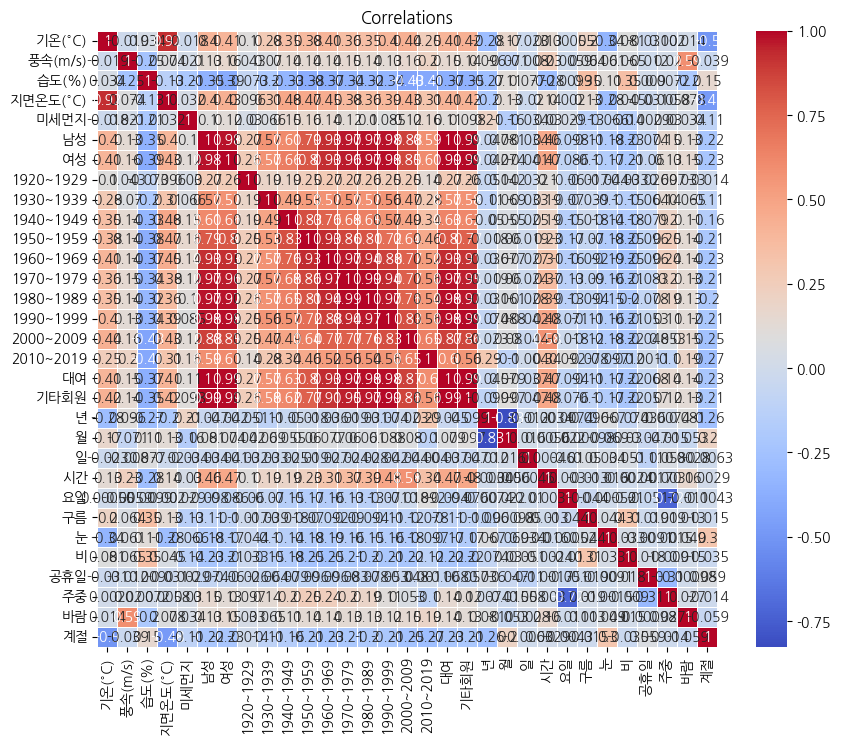

In [241]:
correlation_matrix = df1.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlations')
plt.show()

## feature selection

## 구름
> - 0: 맑음
> - 1: 대체로 맑음
> - 2: 대체로 흐림
> - 3: 흐림
> - 4: 알 수 없음

## 눈
> - 0: 맑음
> - 1: 약한 눈
> - 2: 적당한 눈
> - 3: 강한 눈
> - 4: 알 수 없음

## 비
> - 0: 맑음
> - 1: 약한 눈
> - 2: 적당한 눈
> - 3: 강한 눈
> - 4: 알 수 없음

## 미세먼지
> - 0: 맑음
> - 1: 보통
> - 2: 나쁨
> - 3: 매우 나쁨

## 바람
> - 0: 약한 바람
> - 1: 약한 강한 바람
> - 2: 강한 바람
> - 3: 매우 강한 바람

## 계절
> - 0: 봄
> - 1: 여름
> - 2: 가을
> - 3: 겨울

## 요일
> - 0: 월요일
> - 1: 화요일
> - 2: 수요일
> - 3: 목요일
> - 4: 금요일
> - 5: 토요일
> - 6: 일요일

## 공휴일
> - 0: 공휴일 아님
> - 1: 공휴일 -> 공휴일이 토요일(5) 또는 일요일(6)인 경우 다음 월요일을 대체 공휴일로 지정

## 주중
> - 0: 쉬는 날
> - 1: 주말과 공휴일을 제외한 주중

## 시각화

In [477]:
df1.head()

기온(°C)  풍속(m/s)  습도(%)  지면온도(°C)  미세먼지    남성   여성  1920~1929  1930~1939  \
0    20.7      2.0     66      19.2     0  1824  671          0          2   
1    20.5      1.0     67      19.2     0  1214  345          0          3   
2    20.4      1.1     69      18.9     0   795  200          0          3   
3    20.1      1.2     70      18.7     0   479  104          0          0   
4    20.2      1.4     70      18.6     1   468  144          0          1   

   1940~1949  1950~1959  1960~1969  1970~1979  1980~1989  1990~1999  \
0          3         33        193        266        371        996   
1          4         39        193        199        191        578   
2          2         30        139        141        148        322   
3          0         17         98        107         86        188   
4          2         29        131        126        104        151   

   2000~2009  2010~2019    대여  기타회원     년  월  일  시간  요일  구름  눈  비  공휴일  주중  \
0        629          2  2495  1371  2023  6  1   0   3   3  0  0    0   1   
1        352          0  1559   890  2023  6  1   1   3   3  0  0    0   1   
2        209          1   995   587  2023  6  1   2   3   3  0  0    0   1   
3         86          1   583   352  2023  6  1   3   3   3  0  0    0   1   
4         68          0   612   295  2023  6  1   4   3   3  0  0    0   1   

   바람  계절  
0   0   1  
1   0   1  
2   0   1  
3   0   1  
4   0   1

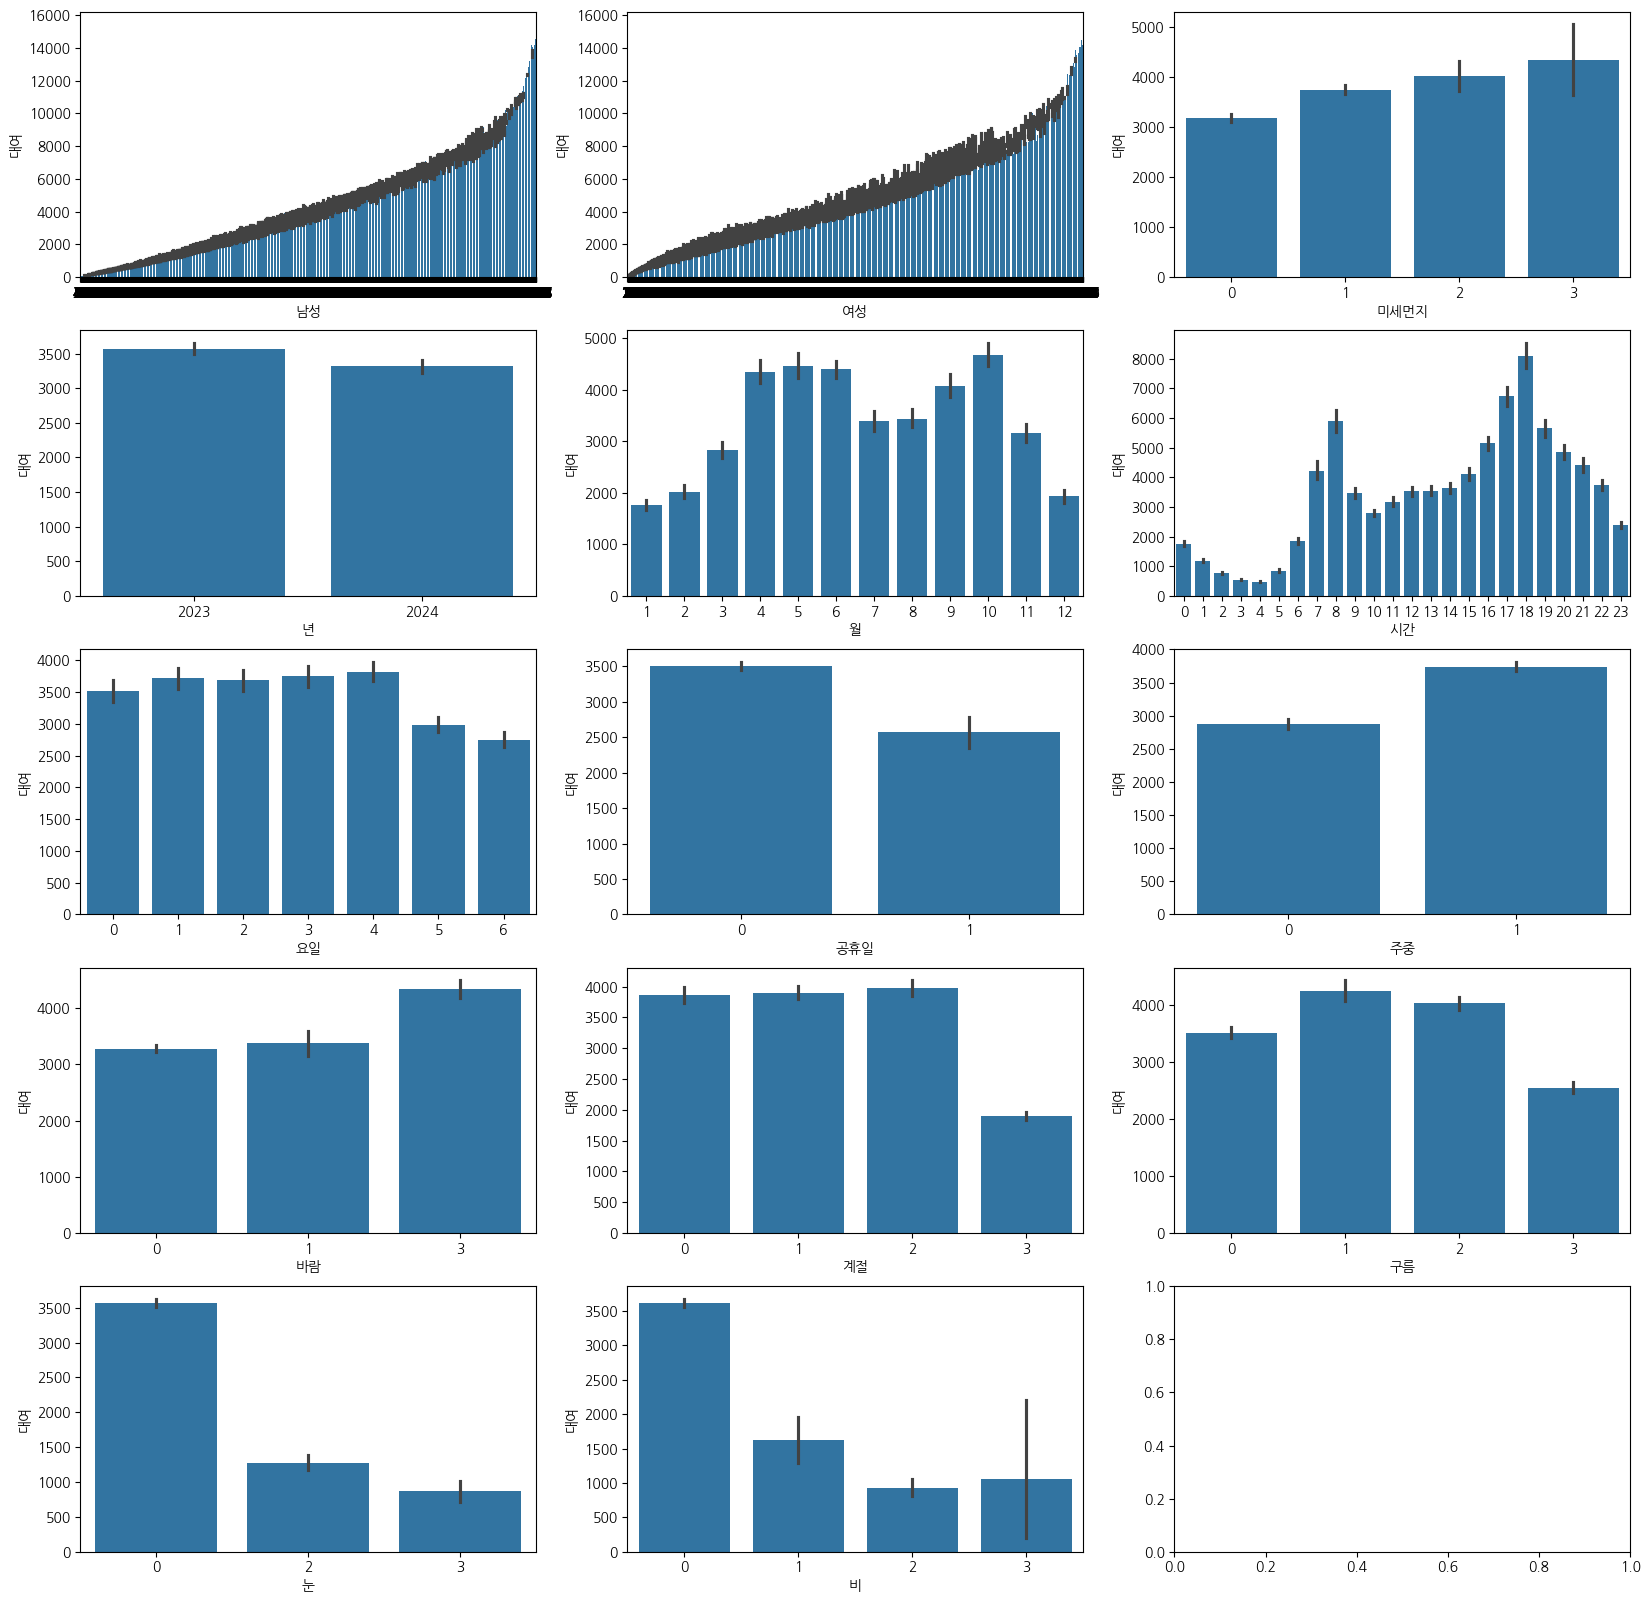

In [243]:
fig, axs = plt.subplots(figsize=(20, 20), ncols=3, nrows=5)
features = ['남성', '여성', '미세먼지', '년', '월', '시간', '요일', '공휴일', '주중', '바람', '계절', '구름', '눈', '비']

for i, feature in enumerate(features):
    row = int(i/3)
    col = i%3
    sns.barplot(x=feature, y='대여', data=df1, ax=axs[row][col])

<Axes: xlabel='시간', ylabel='대여'>

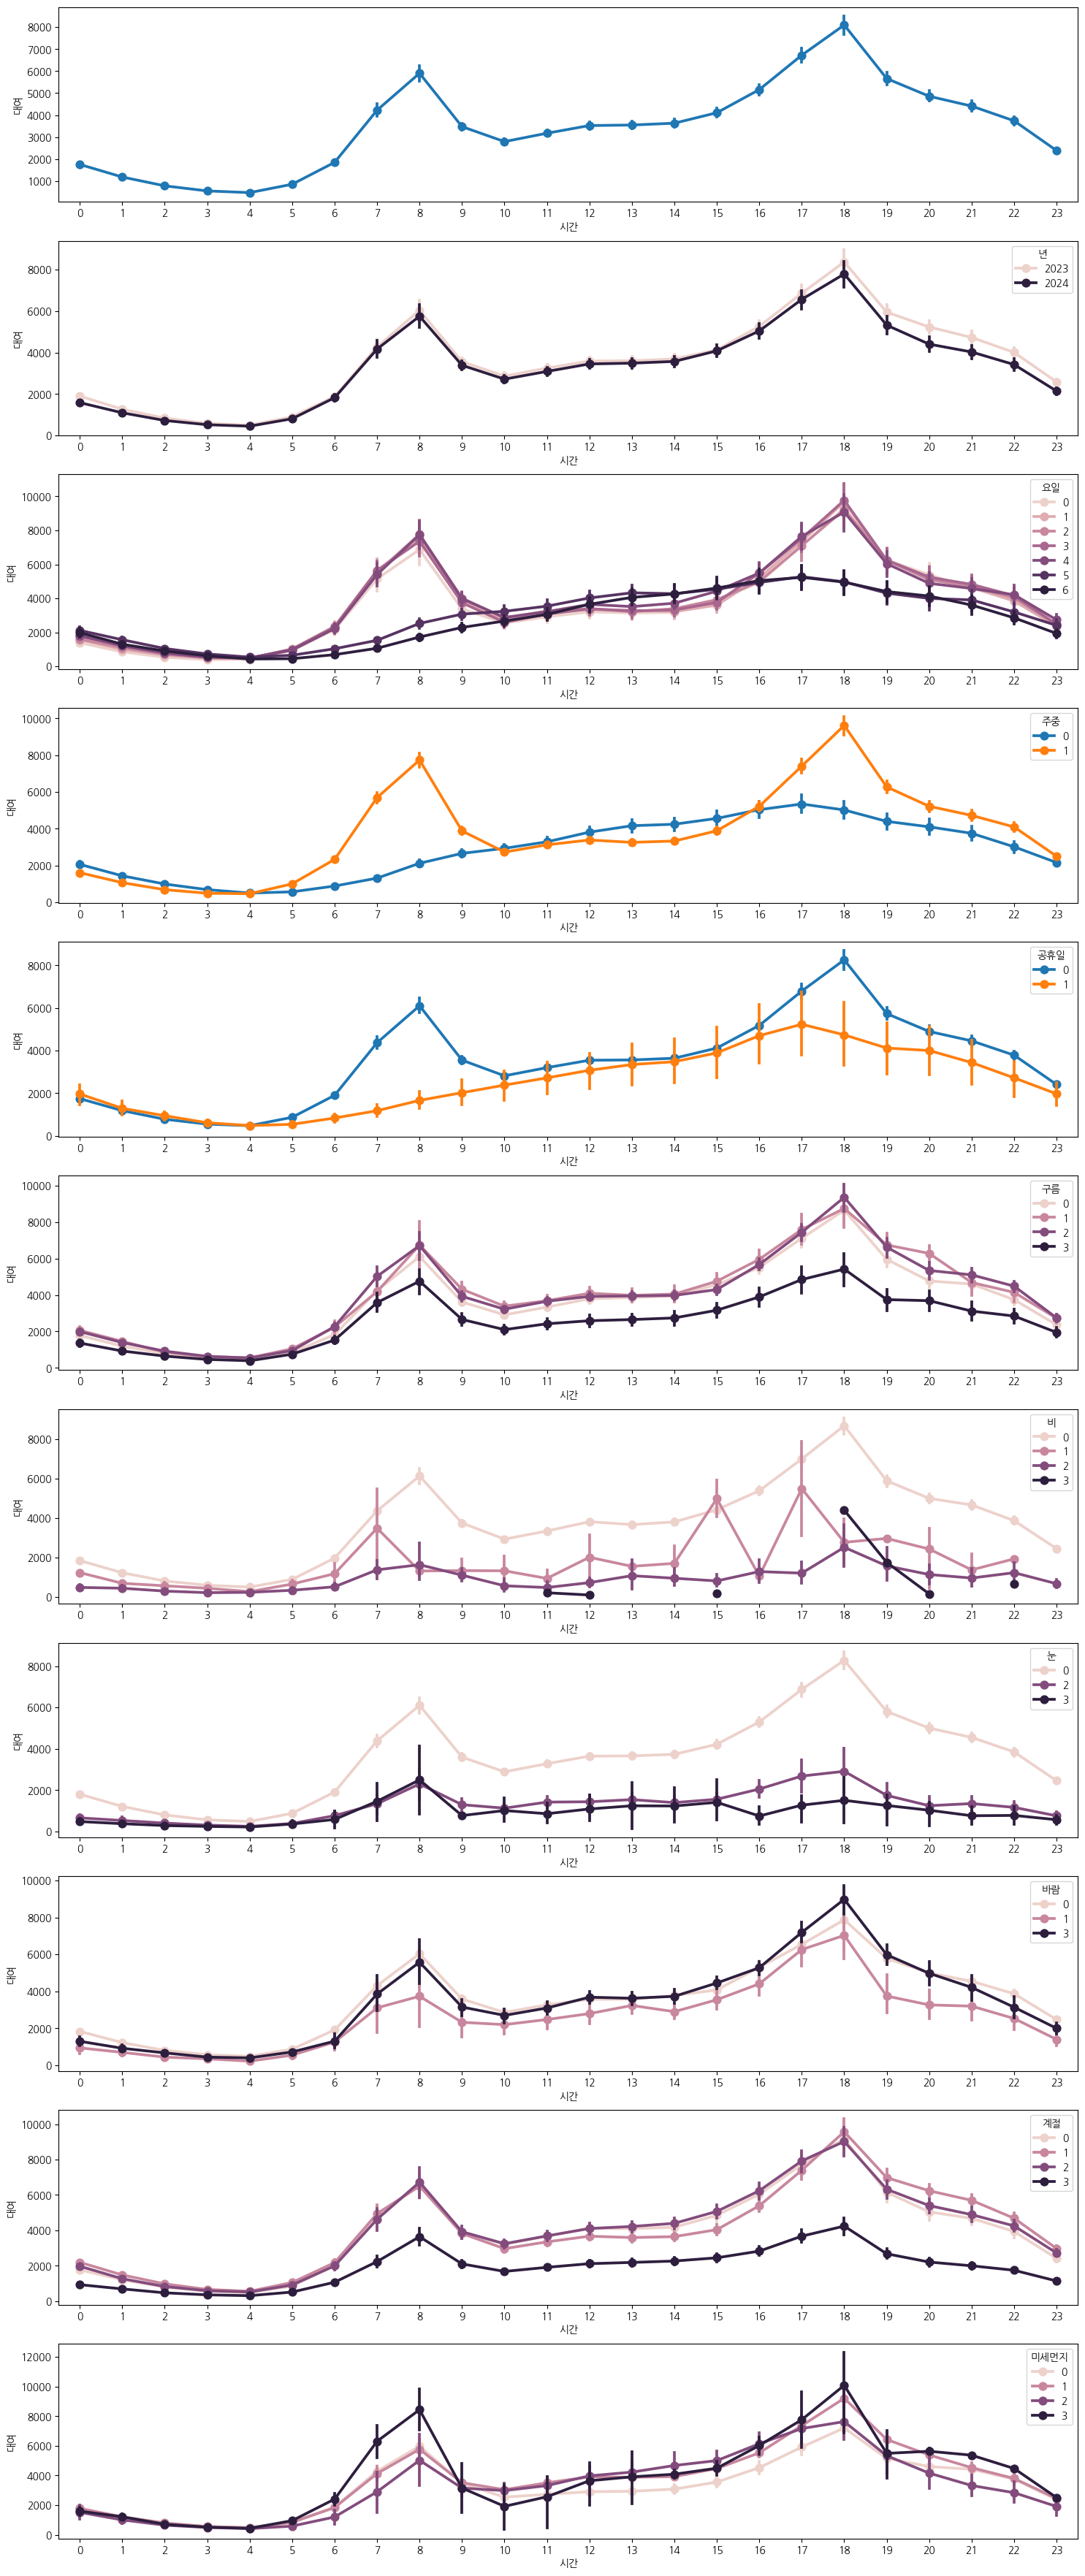

In [244]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7, ax8, ax9, ax10, ax11)= plt.subplots(nrows=11)
fig.set_size_inches(18,45)

sns.pointplot(data=df1, x="시간", y="대여", ax=ax1)

sns.pointplot(data=df1, x="시간", y="대여", hue="년", ax=ax2)

sns.pointplot(data=df1, x="시간", y="대여", hue="요일", ax=ax3)

sns.pointplot(data=df1, x="시간", y="대여", hue="주중", ax=ax4)

sns.pointplot(data=df1, x="시간", y="대여", hue="공휴일", ax=ax5)

sns.pointplot(data=df1, x="시간", y="대여", hue="구름", ax=ax6)

sns.pointplot(data=df1, x="시간", y="대여", hue="비", ax=ax7)

sns.pointplot(data=df1, x="시간", y="대여", hue="눈", ax=ax8)

sns.pointplot(data=df1, x="시간", y="대여", hue="바람", ax=ax9)

sns.pointplot(data=df1, x="시간", y="대여", hue="계절", ax=ax10)

sns.pointplot(data=df1, x="시간", y="대여", hue="미세먼지", ax=ax11)


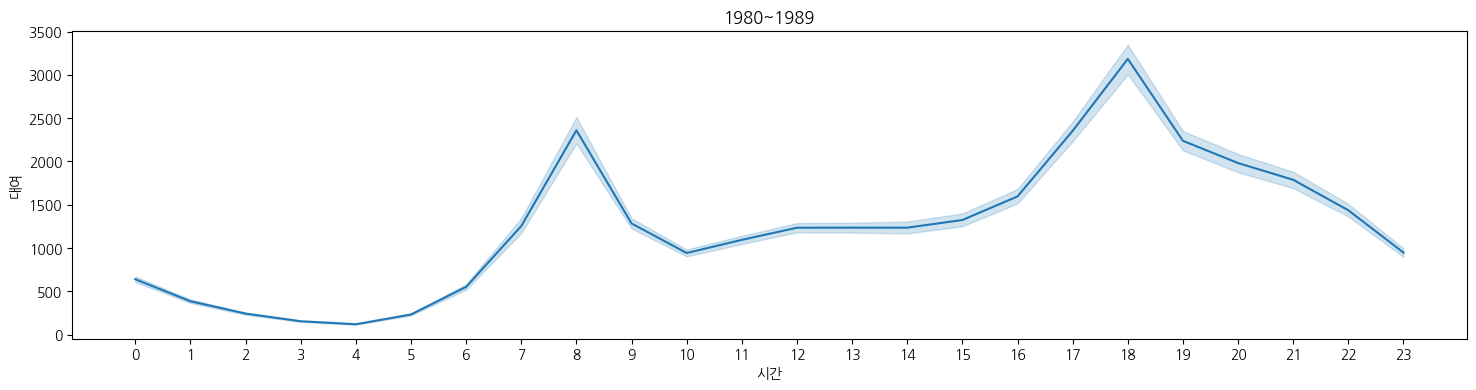

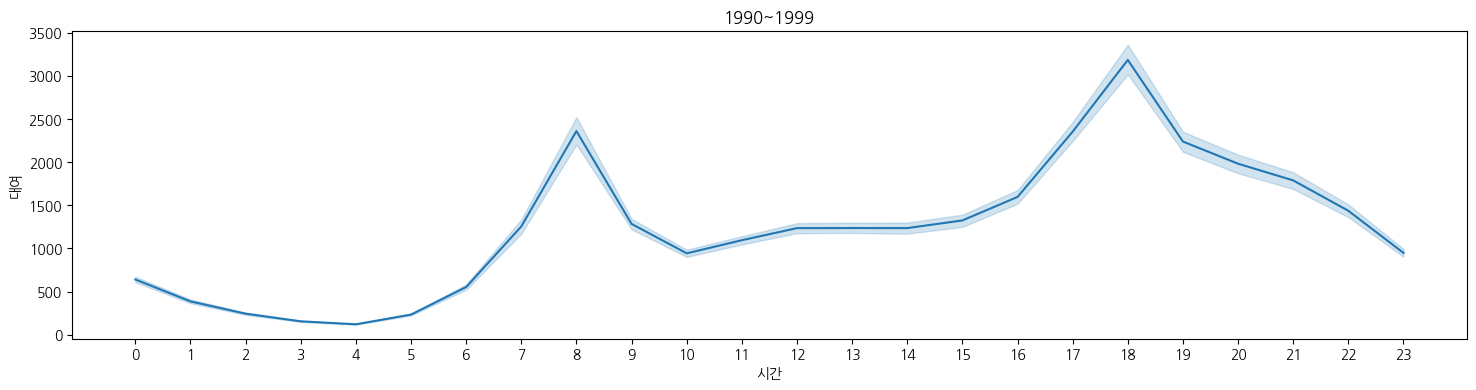

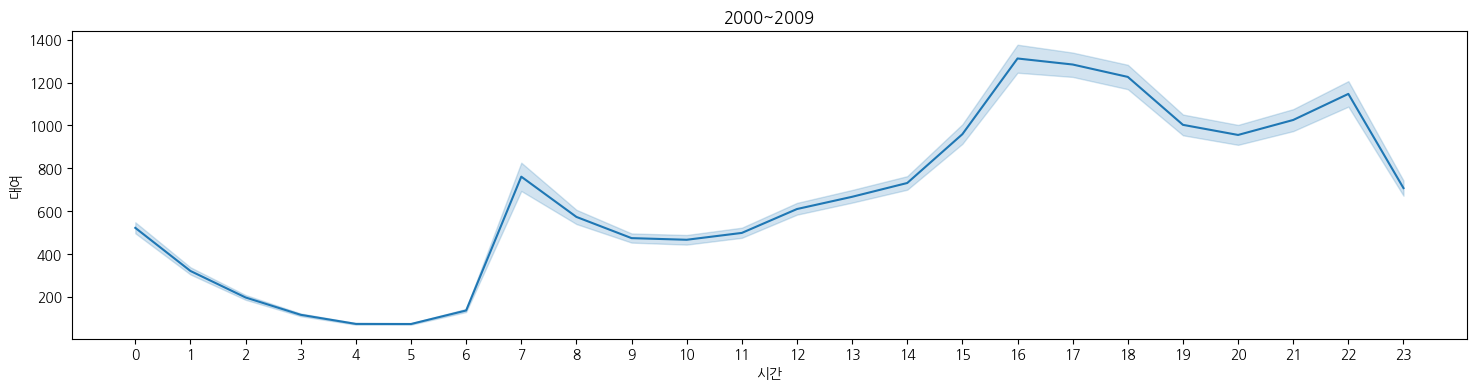

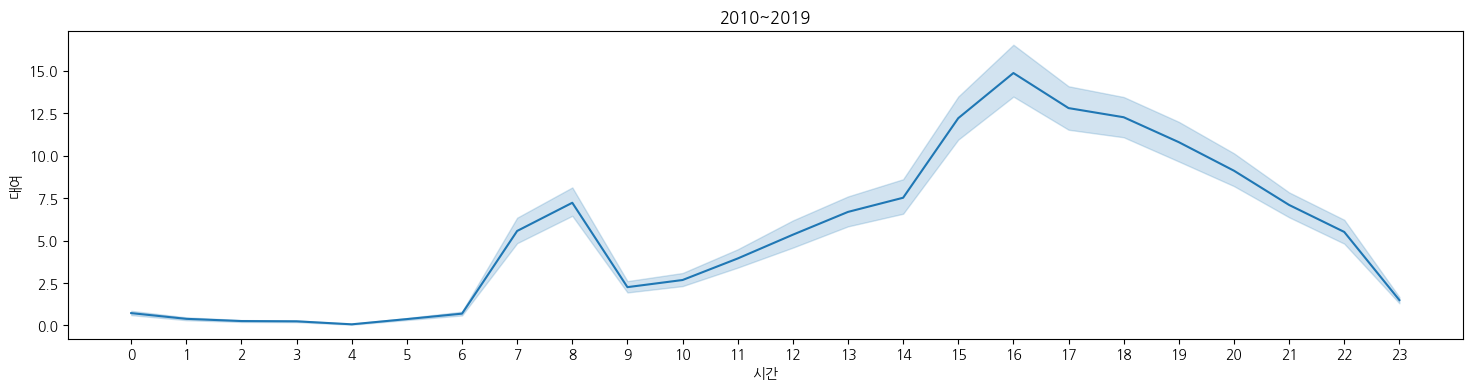

In [245]:
plt.figure(figsize=(18, 4))
sns.lineplot(data=total_data, x='시간', y='1990~1999')
plt.title('1980~1989')
plt.xlabel('시간')
plt.ylabel('대여')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.show()

plt.figure(figsize=(18, 4))
sns.lineplot(data=total_data, x='시간', y='1990~1999')
plt.title('1990~1999')
plt.xlabel('시간')
plt.ylabel('대여')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.show()

plt.figure(figsize=(18, 4))
sns.lineplot(data=total_data, x='시간', y='2000~2009')
plt.title('2000~2009')
plt.xlabel('시간')
plt.ylabel('대여')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.show()

plt.figure(figsize=(18, 4))
sns.lineplot(data=total_data, x='시간', y='2010~2019')
plt.title('2010~2019')
plt.xlabel('시간')
plt.ylabel('대여')
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.show()

In [246]:
df1.sum()

기온(°C)         134576.5
풍속(m/s)         20261.6
습도(%)          602781.0
지면온도(°C)       147700.3
미세먼지             4556.0
남성           19522890.0
여성           11542474.0
1920~1929         514.0
1930~1939       13229.0
1940~1949       68791.0
1950~1959      558236.0
1960~1969     2483632.0
1970~1979     4661606.0
1980~1989     6127582.0
1990~1999    11173634.0
2000~2009     5925388.0
2010~2019       48892.0
대여           31065231.0
기타회원         14707797.0
년            18188890.0
월               58159.0
일              141551.0
시간             103128.0
요일              27284.0
구름              12401.0
눈                 889.0
비                1037.0
공휴일               404.0
주중               6037.0
바람               4984.0
계절              13078.0
dtype: float64

<Axes: xlabel='시간', ylabel='기타회원'>

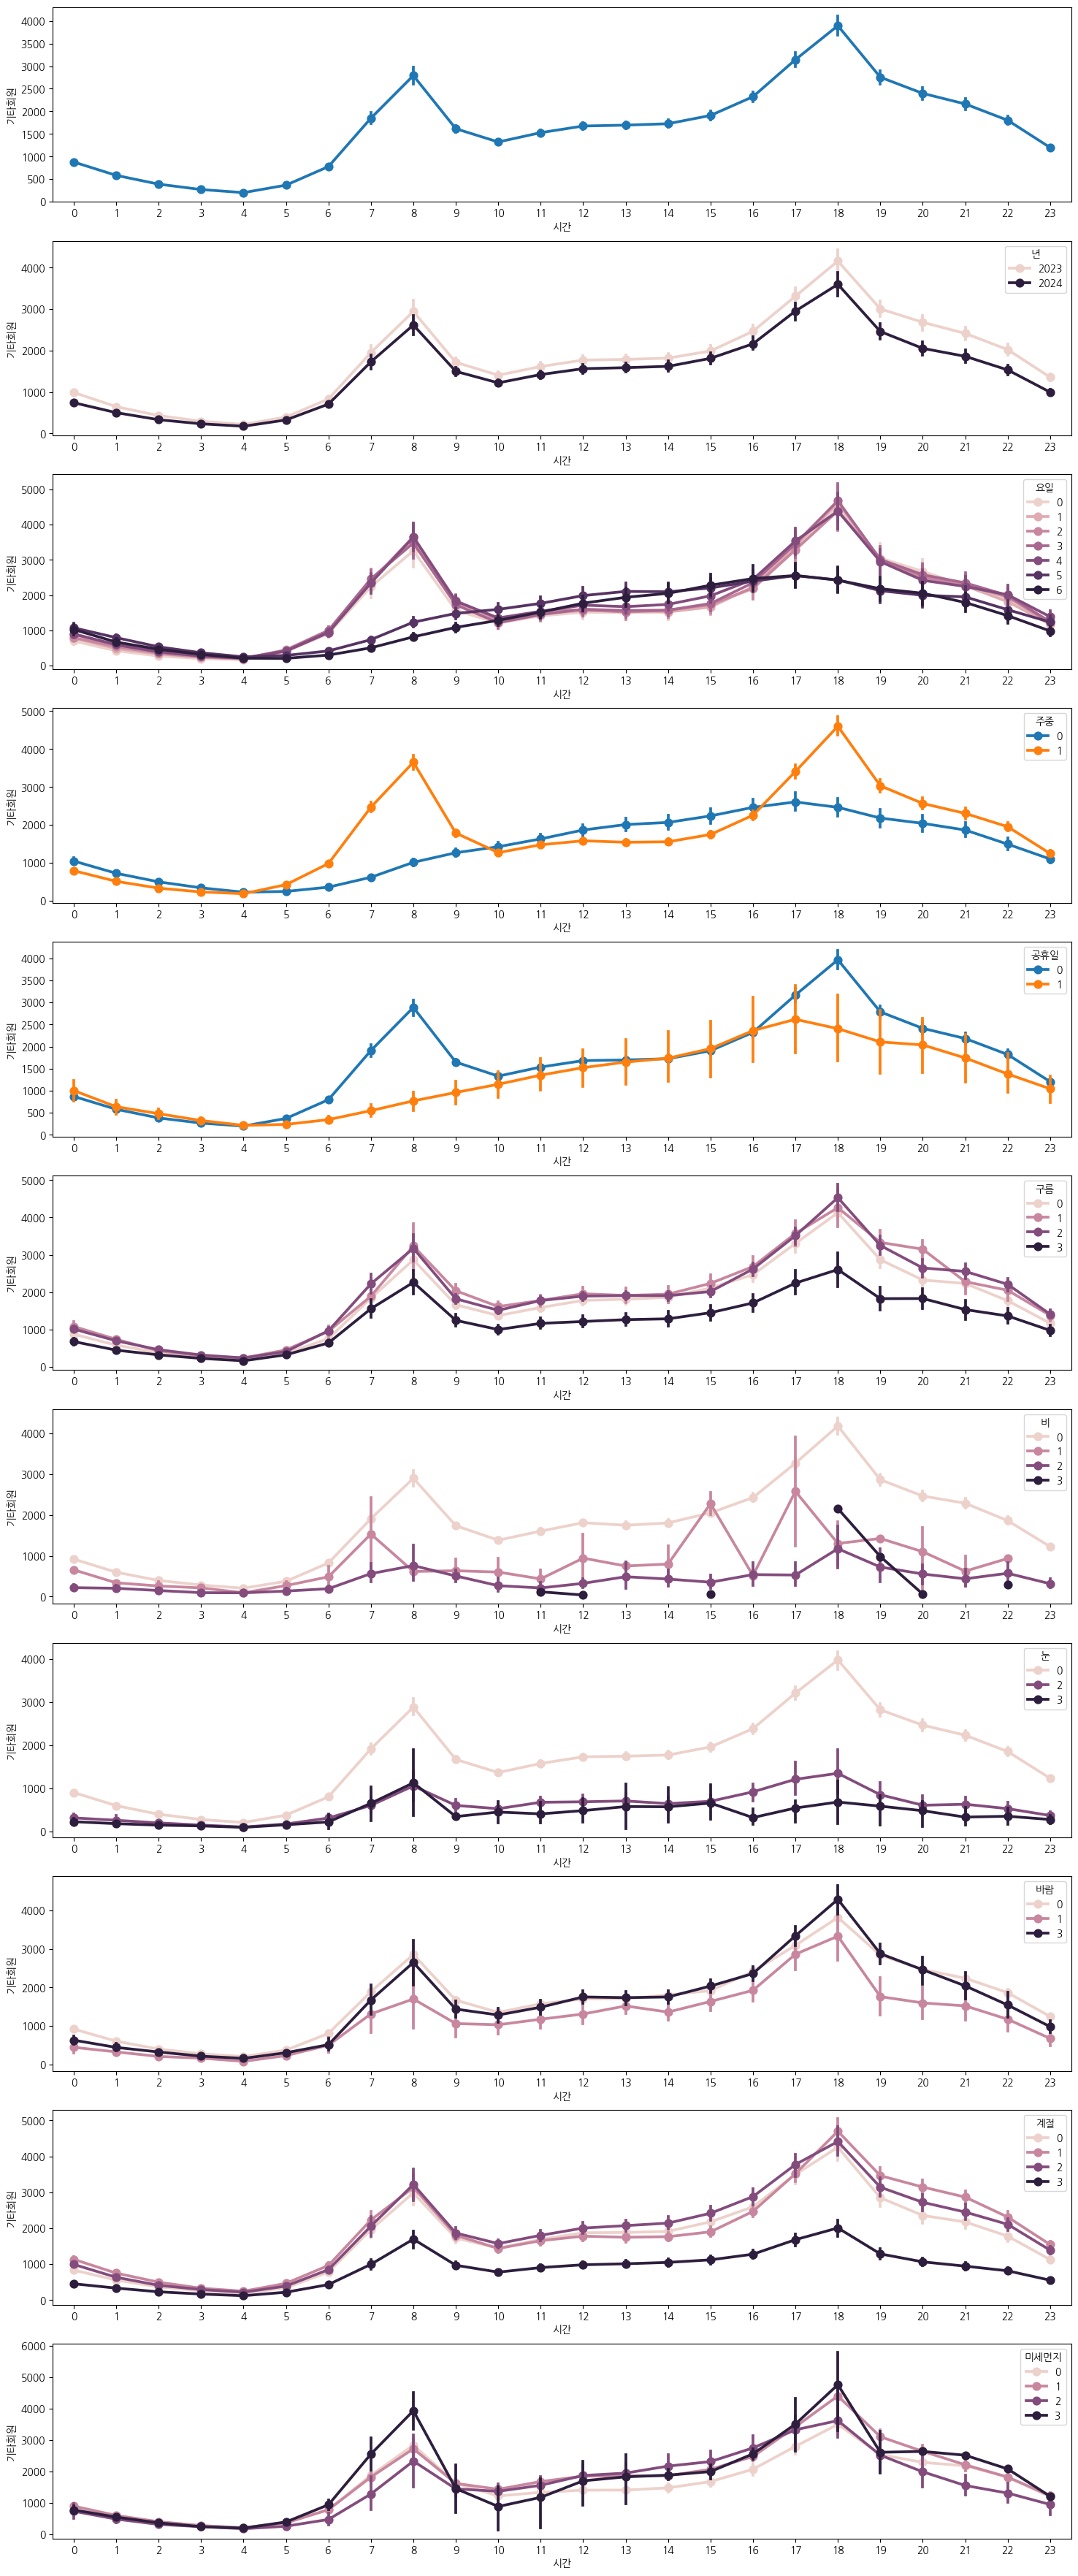

In [247]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6,ax7, ax8, ax9, ax10, ax11)= plt.subplots(nrows=11)
fig.set_size_inches(18,45)

sns.pointplot(data=df1, x="시간", y="기타회원", ax=ax1)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="년", ax=ax2)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="요일", ax=ax3)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="주중", ax=ax4)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="공휴일", ax=ax5)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="구름", ax=ax6)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="비", ax=ax7)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="눈", ax=ax8)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="바람", ax=ax9)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="계절", ax=ax10)

sns.pointplot(data=df1, x="시간", y="기타회원", hue="미세먼지", ax=ax11)


/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/497187363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')


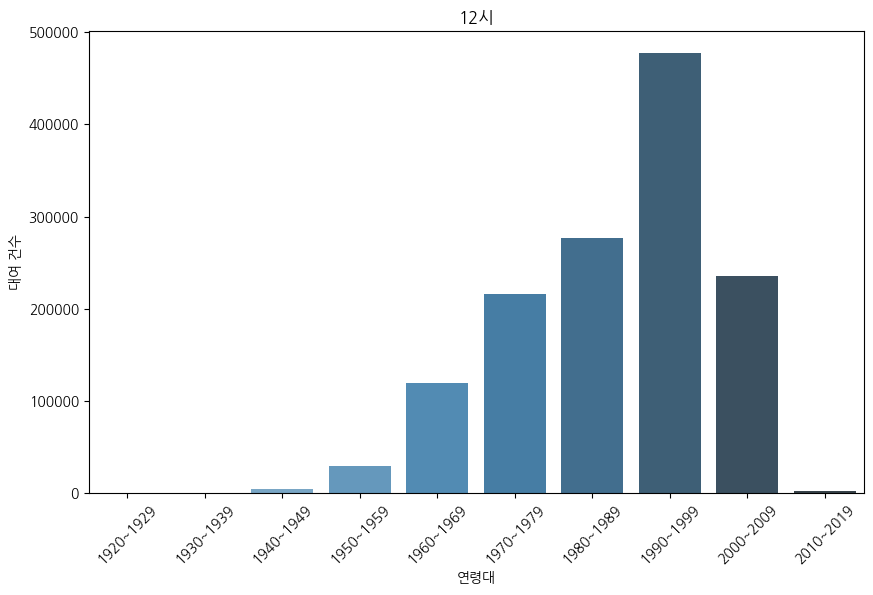

In [248]:
hour_12_data = total_data[total_data['시간'] == 12]

age_columns = ['1920~1929', '1930~1939', '1940~1949', '1950~1959', '1960~1969', 
               '1970~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019']

age_sums = hour_12_data[age_columns].sum()

age_sums_df = age_sums.reset_index()
age_sums_df.columns = ['연령대', '대여 건수']

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')
plt.title('12시')
plt.xlabel('연령대')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)
plt.show()

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/2045605574.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')


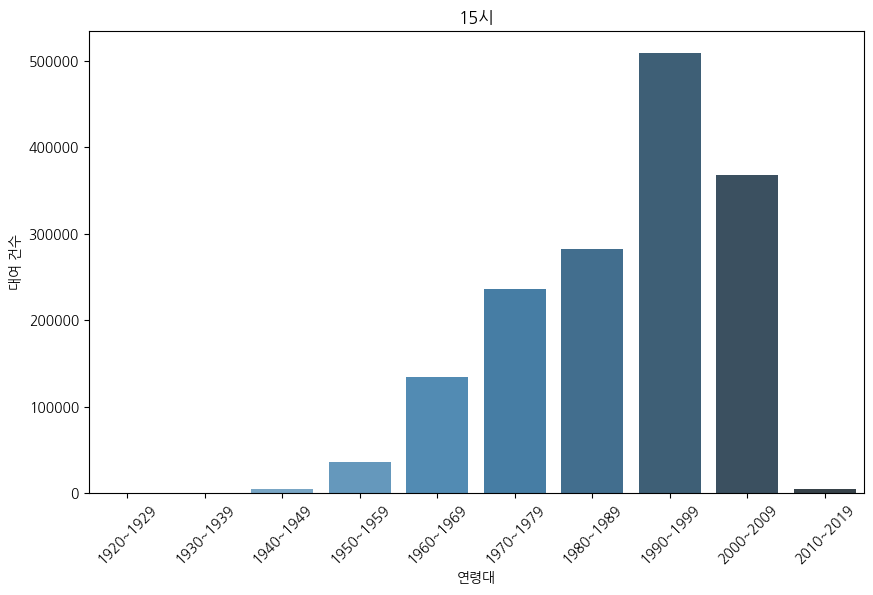

In [249]:
hour_12_data = total_data[total_data['시간'] == 15]

age_columns = ['1920~1929', '1930~1939', '1940~1949', '1950~1959', '1960~1969', 
               '1970~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019']

age_sums = hour_12_data[age_columns].sum()

age_sums_df = age_sums.reset_index()
age_sums_df.columns = ['연령대', '대여 건수']

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')
plt.title('15시')
plt.xlabel('연령대')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)
plt.show()

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/3993070233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')


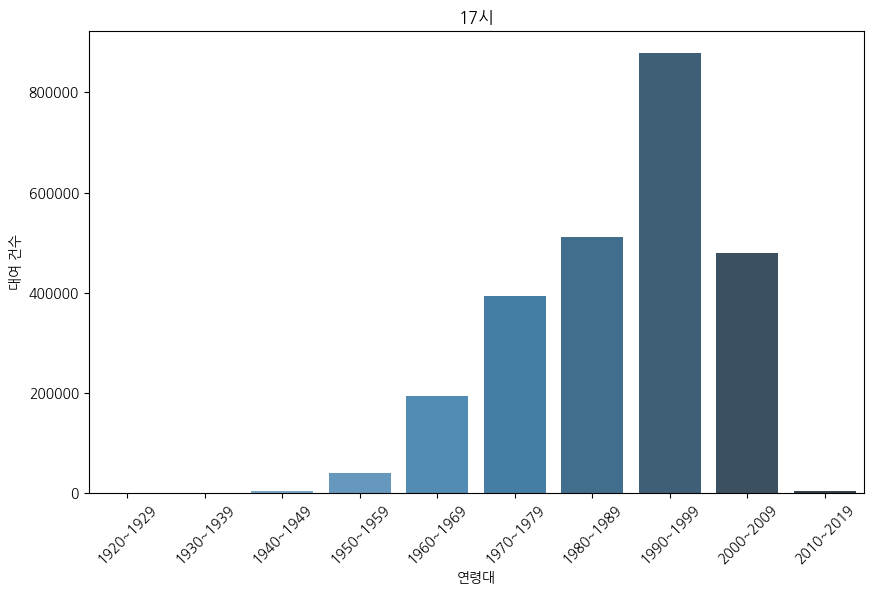

In [250]:
hour_12_data = total_data[total_data['시간'] == 17]

age_columns = ['1920~1929', '1930~1939', '1940~1949', '1950~1959', '1960~1969', 
               '1970~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019']

age_sums = hour_12_data[age_columns].sum()

age_sums_df = age_sums.reset_index()
age_sums_df.columns = ['연령대', '대여 건수']

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')
plt.title('17시')
plt.xlabel('연령대')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)
plt.show()

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/4055084601.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')


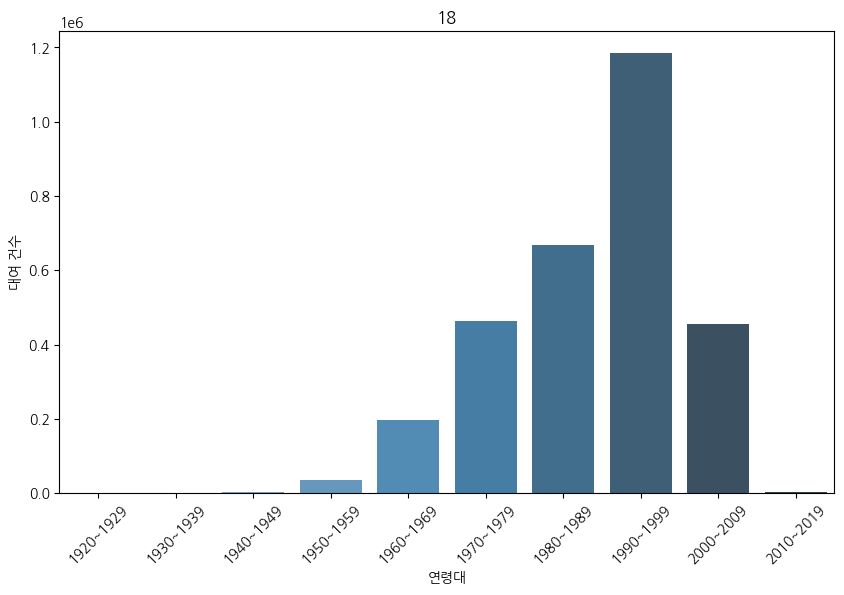

In [251]:
hour_12_data = total_data[total_data['시간'] == 18]

age_columns = ['1920~1929', '1930~1939', '1940~1949', '1950~1959', '1960~1969', 
               '1970~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019']

age_sums = hour_12_data[age_columns].sum()

age_sums_df = age_sums.reset_index()
age_sums_df.columns = ['연령대', '대여 건수']

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')
plt.title('18')
plt.xlabel('연령대')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)
plt.show()

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/449645887.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')


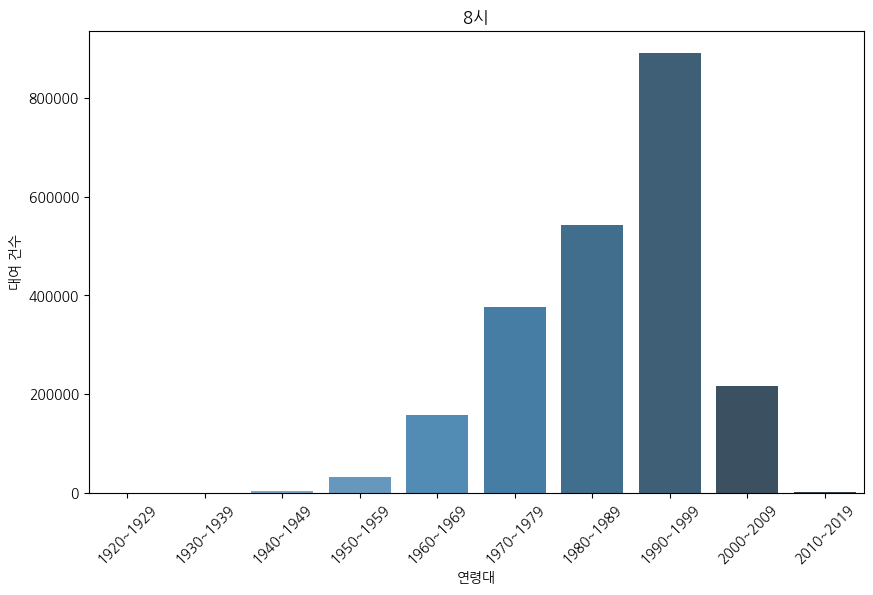

In [252]:
hour_12_data = total_data[total_data['시간'] == 8]

age_columns = ['1920~1929', '1930~1939', '1940~1949', '1950~1959', '1960~1969', 
               '1970~1979', '1980~1989', '1990~1999', '2000~2009', '2010~2019']

age_sums = hour_12_data[age_columns].sum()

age_sums_df = age_sums.reset_index()
age_sums_df.columns = ['연령대', '대여 건수']

plt.figure(figsize=(10, 6))
sns.barplot(x='연령대', y='대여 건수', data=age_sums_df, palette='Blues_d')
plt.title('8시')
plt.xlabel('연령대')
plt.ylabel('대여 건수')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='시간', ylabel='대여'>

/Users/jangtaehun/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/jangtaehun/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


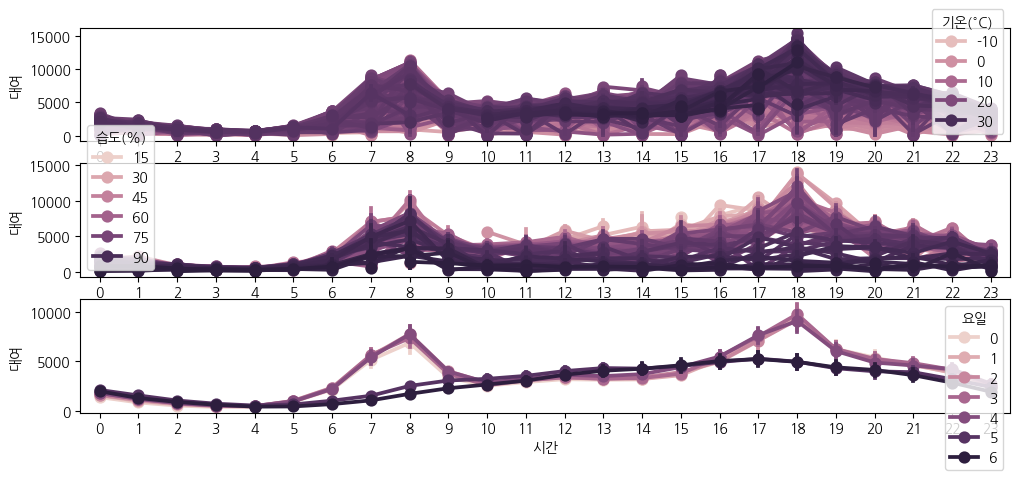

In [253]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,5)
sns.pointplot(data=df1, x="시간", y="대여", hue="기온(°C)", ax=ax1)
sns.pointplot(data=df1, x="시간", y="대여", hue="습도(%)", ax=ax2)
sns.pointplot(data=df1, x="시간", y="대여", hue="요일", ax=ax3)


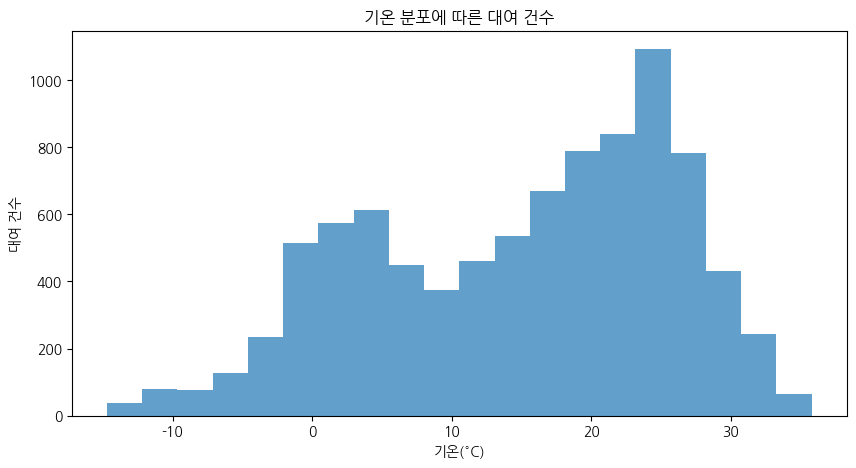

In [254]:
df1['기온(°C)'].plot(kind='hist', bins=20, alpha=0.7, figsize=(10, 5))
plt.title('기온 분포에 따른 대여 건수')
plt.xlabel('기온(°C)')
plt.ylabel('대여 건수')
plt.show()

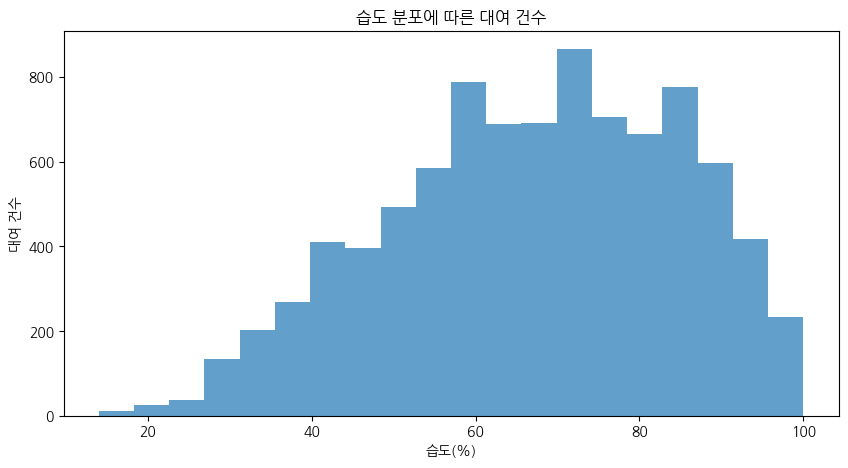

In [255]:
df1['습도(%)'].plot(kind='hist', bins=20, alpha=0.7, figsize=(10, 5))
plt.title('습도 분포에 따른 대여 건수')
plt.xlabel('습도(%)')
plt.ylabel('대여 건수')
plt.show()

In [256]:
df1.groupby(['미세먼지'])['계절'].mean().plot.bar(rot=0, figsize=(10, 3))
plt.title('미세먼지 농도별 계절 평균값', fontsize=16)
plt.show()

In [257]:
df1.groupby(['미세먼지'])['구름'].mean().plot.bar(rot=0, figsize=(10, 3))
plt.title('미세먼지 농도별 구름 평균값', fontsize=16)
plt.show()

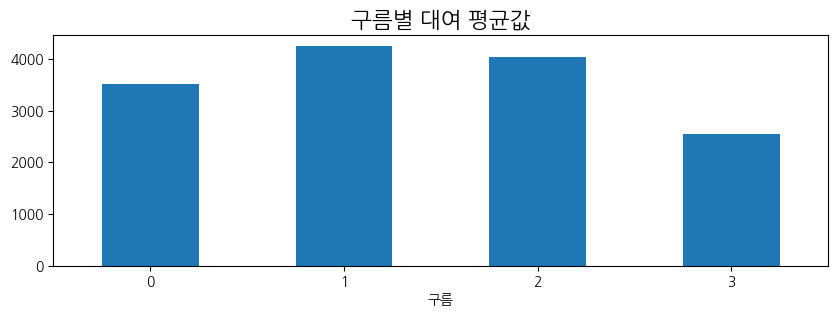

In [258]:
df1.groupby(['구름'])['대여'].mean().plot.bar(rot=0, figsize=(10, 3))
plt.title('구름별 대여 평균값', fontsize=16)
plt.show()

In [259]:
corr_matrix = df1[['대여', '기온(°C)', '습도(%)', '지면온도(°C)', '미세먼지', '월', '요일', '구름', '눈', '비', '공휴일', '주중', '바람', '계절']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.show()

In [478]:
cluster_X = df1

In [479]:
df1.drop(['풍속(m/s)', '남성', '여성', '1920~1929','1930~1939','1940~1949','1950~1959','1960~1969','1970~1979','1980~1989','1990~1999','2000~2009','2010~2019'], axis=1, inplace=True)
df1.drop(['기타회원'], axis=1, inplace=True)


In [480]:
df1

기온(°C)  습도(%)  지면온도(°C)  미세먼지    대여     년  월   일  시간  요일  구름  눈  비  공휴일  \
0       20.7     66      19.2     0  2495  2023  6   1   0   3   3  0  0    0   
1       20.5     67      19.2     0  1559  2023  6   1   1   3   3  0  0    0   
2       20.4     69      18.9     0   995  2023  6   1   2   3   3  0  0    0   
3       20.1     70      18.7     0   583  2023  6   1   3   3   3  0  0    0   
4       20.2     70      18.6     1   612  2023  6   1   4   3   3  0  0    0   
...      ...    ...       ...   ...   ...   ... ..  ..  ..  ..  .. .. ..  ...   
8984    24.7     81      23.8     0  5929  2024  6  30  19   6   0  0  0    0   
8985    24.5     82      23.0     0  5591  2024  6  30  20   6   1  0  0    0   
8986    23.8     83      21.8     1  5096  2024  6  30  21   6   1  0  0    0   
8987    23.1     85      21.3     0  4034  2024  6  30  22   6   2  0  0    0   
8988    22.8     86      21.4     1  2565  2024  6  30  23   6   1  0  0    0   

      주중  바람  계절  
0      1   0   1  
1      1   0   1  
2      1   0   1  
3      1   0   1  
4      1   0   1  
...   ..  ..  ..  
8984   0   0   1  
8985   0   3   1  
8986   0   0   1  
8987   0   0   1  
8988   0   0   1  

[8989 rows x 17 columns]

## test data

In [425]:
pred_y = df1['대여']
pred_X = df1.drop(['대여'], axis=1)

In [426]:
pred_y_log = np.log1p(pred_y)

In [575]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))
    return rmsle(y, pred)

scores = make_scorer(evaluate_regr)

In [482]:
y = df1['대여']
X = df1.drop(['대여'], axis=1)

In [265]:
from scipy import stats

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(df1["대여"], ax=axes[0][0])
stats.probplot(df1["대여"], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(np.log(df1["대여"]), ax=axes[1][0])
stats.probplot(np.log1p(df1["대여"]), dist='norm', fit=True, plot=axes[1][1])

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/2821742531.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1["대여"], ax=axes[0][0])
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/2821742531.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df1["대여"]

((array([-3.7841815 , -3.55754905, -3.43305712, ...,  3.43305712,
          3.55754905,  3.7841815 ]),
  array([2.83321334, 2.99573227, 3.61091791, ..., 9.60562046, 9.64270703,
         9.64400413])),
 (1.0161065877852864, 7.729268185362442, 0.9780331303675893))

In [483]:
y_log = np.log1p(y)

In [486]:
# X_1 = X.drop(['지면온도(°C)'], axis=1)
# X_2 = X.drop(['년'], axis=1)
# X_3 = X.drop(['지면온도(°C)', '년'], axis=1)
# X_4 = X.drop(['요일'], axis=1)
# X_5 = X.drop(['주중', '년'], axis=1)

# 모두 포함 = 0.04048

# 지면온도(°C)만 빼기 = 0.04069
# 년만 빼기 = 0.04069
# 지면온도(°C), 년 빼기 = 0.04075

# 요일만 빼기 = 0.04236
# 주중만 빼기 = 0.04065

# 년월 요일주중

In [487]:
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# scaling_columns = ['기온(°C)', '습도(%)'] # '지면온도(°C)'
# sc = StandardScaler()
# X_sc = sc.fit_transform(X[scaling_columns])


In [576]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100)

In [577]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [578]:
%time
score = cross_val_score(rf, X, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 7.87 μs
RMSLE: 0.035, RMSE: 0.264, MAE: 0.146
RMSLE: 0.038, RMSE: 0.273, MAE: 0.150
RMSLE: 0.037, RMSE: 0.281, MAE: 0.155
RMSLE: 0.039, RMSE: 0.297, MAE: 0.160
RMSLE: 0.046, RMSE: 0.340, MAE: 0.165
RMSLE: 0.036, RMSE: 0.276, MAE: 0.150
RMSLE: 0.035, RMSE: 0.270, MAE: 0.150
RMSLE: 0.051, RMSE: 0.361, MAE: 0.169
RMSLE: 0.049, RMSE: 0.355, MAE: 0.165
RMSLE: 0.041, RMSE: 0.306, MAE: 0.158
Score= 0.04069


In [579]:
rf.fit(X, y_log)

RandomForestRegressor()

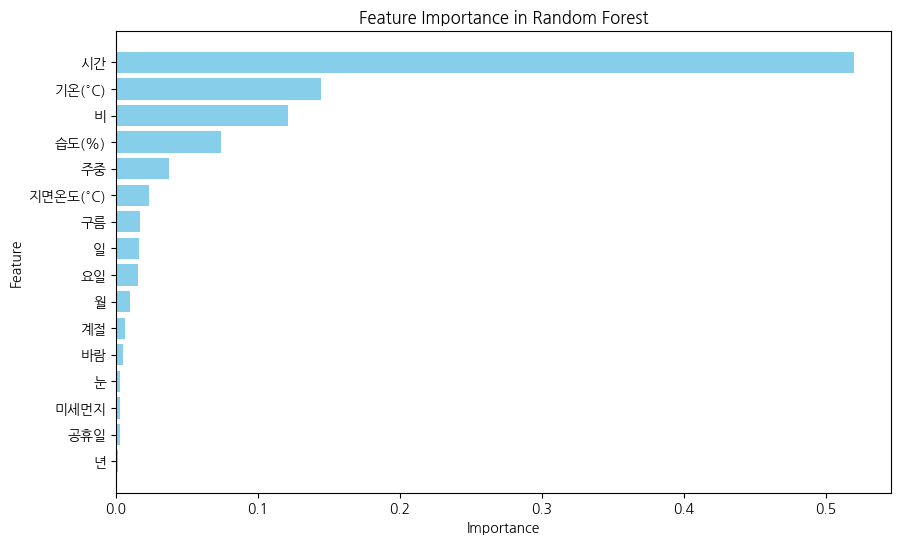

In [274]:
importances = rf.feature_importances_
features = X.columns  # 또는 학습에 사용한 feature names

# 피처 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 중요도가 높은 것이 위로 오도록 반전
plt.show()

## XGBoost

In [275]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [276]:
# categorical_feature = ['season', 'holiday', 'workingday', 'weather', 'year', 'hour', 'dayofweek']
# X_encoded = pd.get_dummies(X, columns=categorical_feature, drop_first=False)
# test_encoded = pd.get_dummies(test_df, columns=categorical_feature, drop_first=False)

xgb = XGBRegressor(n_estimators=100, random_state=0)

In [277]:
%time
score = cross_val_score(xgb, X, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs
RMSLE: 0.035, RMSE: 0.269, MAE: 0.145
RMSLE: 0.031, RMSE: 0.225, MAE: 0.128
RMSLE: 0.033, RMSE: 0.252, MAE: 0.140
RMSLE: 0.037, RMSE: 0.277, MAE: 0.146
RMSLE: 0.042, RMSE: 0.316, MAE: 0.155
RMSLE: 0.033, RMSE: 0.247, MAE: 0.137
RMSLE: 0.032, RMSE: 0.247, MAE: 0.138
RMSLE: 0.050, RMSE: 0.358, MAE: 0.162
RMSLE: 0.046, RMSE: 0.330, MAE: 0.158
RMSLE: 0.038, RMSE: 0.288, MAE: 0.148
Score= 0.03780


In [278]:
xgb.fit(X, y_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [279]:
importances = xgb.feature_importances_
features = X.columns  # 또는 학습에 사용한 feature names

# 피처 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 중요도가 높은 것이 위로 오도록 반전
plt.show()

## CatBoost

In [280]:
cat = CatBoostRegressor(n_estimators=100, random_state=0, verbose=False)


In [281]:
%time
score = cross_val_score(cat, X, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs
RMSLE: 0.034, RMSE: 0.266, MAE: 0.149
RMSLE: 0.033, RMSE: 0.242, MAE: 0.142
RMSLE: 0.034, RMSE: 0.259, MAE: 0.149
RMSLE: 0.035, RMSE: 0.267, MAE: 0.151
RMSLE: 0.043, RMSE: 0.322, MAE: 0.166
RMSLE: 0.034, RMSE: 0.259, MAE: 0.146
RMSLE: 0.034, RMSE: 0.256, MAE: 0.153
RMSLE: 0.051, RMSE: 0.357, MAE: 0.173
RMSLE: 0.044, RMSE: 0.318, MAE: 0.160
RMSLE: 0.037, RMSE: 0.287, MAE: 0.156
Score= 0.03795


In [282]:
cat.fit(X, y_log)

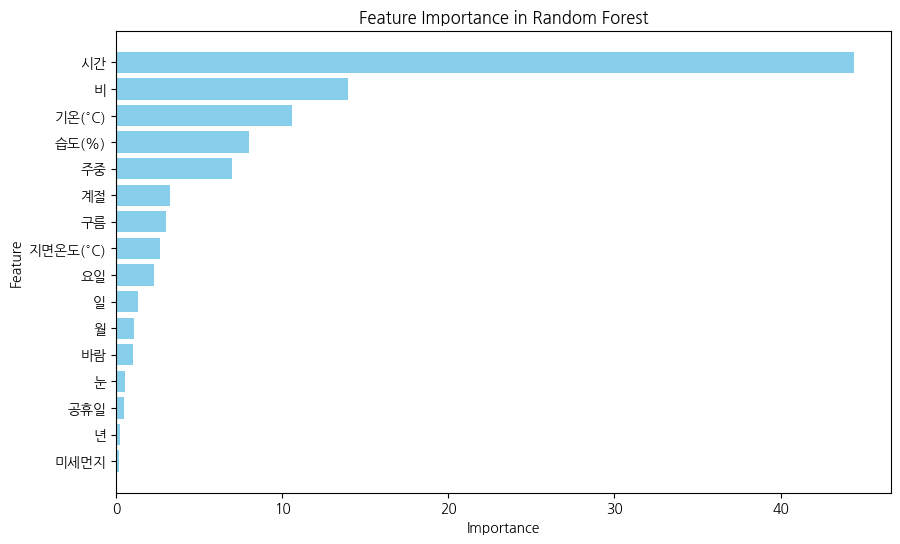

In [283]:
importances = cat.feature_importances_
features = X.columns  # 또는 학습에 사용한 feature names

# 피처 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 중요도가 높은 것이 위로 오도록 반전
plt.show()

## LightGBM

In [490]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# LightGBM 모델 생성
lgbm = LGBMRegressor(n_estimators=100, random_state=0, verbose=-1)

# 시간 측정 시작
%time

# 교차 검증 실행
score = cross_val_score(lgbm, X, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 2 μs, sys: 3 μs, total: 5 μs
Wall time: 10 μs
RMSLE: 0.033, RMSE: 0.258, MAE: 0.145
RMSLE: 0.034, RMSE: 0.246, MAE: 0.143
RMSLE: 0.034, RMSE: 0.264, MAE: 0.150
RMSLE: 0.036, RMSE: 0.273, MAE: 0.152
RMSLE: 0.042, RMSE: 0.314, MAE: 0.158
RMSLE: 0.035, RMSE: 0.261, MAE: 0.146
RMSLE: 0.032, RMSE: 0.245, MAE: 0.144
RMSLE: 0.050, RMSE: 0.352, MAE: 0.167
RMSLE: 0.046, RMSE: 0.331, MAE: 0.160
RMSLE: 0.036, RMSE: 0.275, MAE: 0.151
Score= 0.03776


In [494]:
lgbm.fit(X, y_log)

LGBMRegressor(random_state=0, verbose=-1)

In [516]:
best_params = {'n_estimators': 409, 'learning_rate': 0.07059598427094783, 'num_leaves': 174, 'max_depth': 20, 'min_child_samples': 9, 'subsample': 0.6372901222707613, 'colsample_bytree': 0.6526970337764204}

In [517]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# LightGBM 모델 생성
lgbm = LGBMRegressor(**best_params, random_state=0, verbose=-1)

# 시간 측정 시작
%time

# 교차 검증 실행
score = cross_val_score(lgbm, X, y_log, cv=k_fold, scoring=scores)
score = score.mean()

# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 12.2 μs
RMSLE: 0.030, RMSE: 0.230, MAE: 0.120
RMSLE: 0.028, RMSE: 0.201, MAE: 0.107
RMSLE: 0.029, RMSE: 0.222, MAE: 0.122
RMSLE: 0.032, RMSE: 0.242, MAE: 0.125
RMSLE: 0.039, RMSE: 0.288, MAE: 0.134
RMSLE: 0.031, RMSE: 0.232, MAE: 0.122
RMSLE: 0.031, RMSE: 0.232, MAE: 0.120
RMSLE: 0.045, RMSE: 0.312, MAE: 0.138
RMSLE: 0.040, RMSE: 0.280, MAE: 0.133
RMSLE: 0.034, RMSE: 0.252, MAE: 0.120
Score= 0.03380


In [519]:
lgbm.fit(X, y_log)

LGBMRegressor(colsample_bytree=0.6526970337764204,
              learning_rate=0.07059598427094783, max_depth=20,
              min_child_samples=9, n_estimators=409, num_leaves=174,
              random_state=0, subsample=0.6372901222707613, verbose=-1)

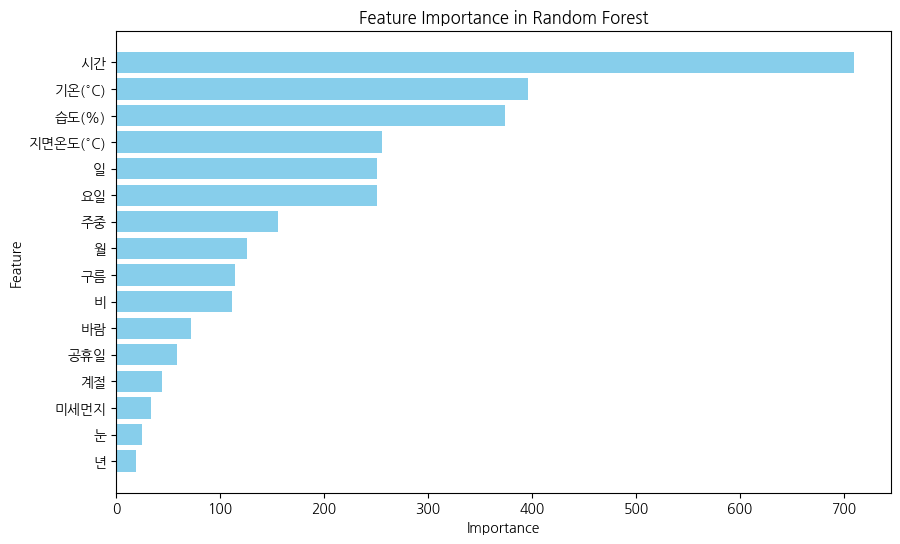

In [286]:
importances = lgbm.feature_importances_
features = X.columns  # 또는 학습에 사용한 feature names

# 피처 중요도를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 중요도가 높은 것이 위로 오도록 반전
plt.show()

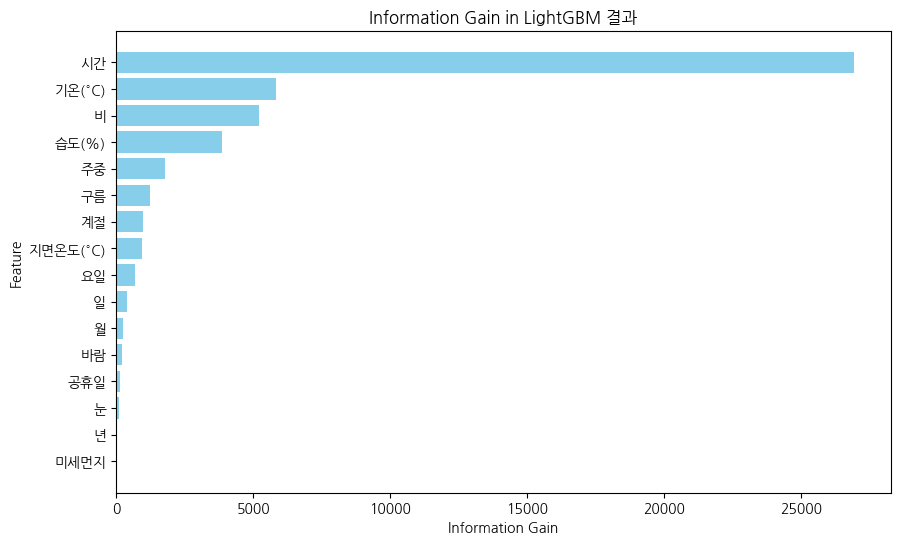

In [287]:
importance_gain = lgbm.booster_.feature_importance(importance_type='gain')

# 특성 이름과 함께 DataFrame으로 정리
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (Information Gain)': importance_gain
}).sort_values(by='Importance (Information Gain)', ascending=False)

# 피처 중요도 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance (Information Gain)'], color='skyblue')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Information Gain in LightGBM 결과')
plt.gca().invert_yaxis()  # 중요도가 높은 피처가 위로 오도록 반전
plt.show()

In [592]:
from sklearn.metrics import mean_squared_log_error

predictions = np.expm1(rf.predict(pred_X))

rmsle = np.sqrt(mean_squared_log_error(pred_y, predictions))
print("RMSLE: ", rmsle)

RMSLE:  0.34891758995051453


In [585]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 모델 리스트 생성
models = {
    "Ridge": Ridge(alpha=1.0, random_state=0),
    "Lasso": Lasso(alpha=0.1, random_state=0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=0)
}

# 교차 검증 및 스코어 계산
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    %time
    score = cross_val_score(model, X, y_log, cv=k_fold, scoring=scores)
    score_mean = score.mean()
    print(f"{model_name} Score = {score_mean:.5f}\n")

Evaluating Ridge
CPU times: user 3 μs, sys: 2 μs, total: 5 μs
Wall time: 9.06 μs
Ridge Score = nan

Evaluating Lasso
CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 9.06 μs
Lasso Score = nan

Evaluating Gradient Boosting
CPU times: user 3 μs, sys: 2 μs, total: 5 μs
Wall time: 8.82 μs


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1408346946.py", line 15, in evaluate_regr
    rmsle_val = rmsle(y, pred)
TypeError: 'numpy.float64' object is not callable

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model

Gradient Boosting Score = nan



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1408346946.py", line 15, in evaluate_regr
    rmsle_val = rmsle(y, pred)
TypeError: 'numpy.float64' object is not callable

  warnings.warn(


# 주성분 분석

In [289]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# 데이터 X_features가 있다고 가정
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(X)

# 각 주성분에서의 로딩 값
loading_matrix = pd.DataFrame(pca.components_.T, 
                              columns=['PC-1', 'PC-2', 'PC-3'], 
                              index=X.columns)

# 로딩 값을 확인
print(loading_matrix)

# PC-1, PC-2, PC-3에서 가장 중요한 변수를 각각 확인
important_vars_pc1 = loading_matrix['PC-1'].abs().sort_values(ascending=False).head()
important_vars_pc2 = loading_matrix['PC-2'].abs().sort_values(ascending=False).head()
important_vars_pc3 = loading_matrix['PC-3'].abs().sort_values(ascending=False).head()

print("PC-1의 주요 변수:\n", important_vars_pc1)
print("PC-2의 주요 변수:\n", important_vars_pc2)
print("PC-3의 주요 변수:\n", important_vars_pc3)


              PC-1      PC-2      PC-3
기온(°C)    0.238628 -0.582243 -0.010266
습도(%)    -0.870819 -0.466578 -0.041710
지면온도(°C)  0.405518 -0.663428  0.017818
미세먼지      0.006258  0.003455 -0.001037
년         0.003553  0.010664  0.000414
월        -0.006095 -0.039302  0.003429
일        -0.047808 -0.013676  0.997607
시간        0.130334  0.005963  0.050478
요일        0.001055  0.000440 -0.002180
구름       -0.016005 -0.024318  0.003063
눈        -0.005876  0.006285  0.001118
비        -0.006857 -0.006285  0.001188
공휴일      -0.000214  0.000311 -0.002666
주중       -0.000138 -0.000221  0.003102
바람        0.012360  0.003484  0.003513
계절       -0.020794  0.024197 -0.003156
PC-1의 주요 변수:
 습도(%)       0.870819
지면온도(°C)    0.405518
기온(°C)      0.238628
시간          0.130334
일           0.047808
Name: PC-1, dtype: float64
PC-2의 주요 변수:
 지면온도(°C)    0.663428
기온(°C)      0.582243
습도(%)       0.466578
월           0.039302
구름          0.024318
Name: PC-2, dtype: float64
PC-3의 주요 변수:
 일           0.997607
시간        

In [290]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA 모델 훈련
pca = PCA()
pca.fit(X)

# 설명 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# 설명 분산 비율 출력
print(f"설명 분산 비율: {explained_variance_ratio}")
print(f"누적 설명 분산 비율: {cumulative_variance_ratio}")

# 스크리 플롯 그리기
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.9, color='r', linestyle='--')  # 예시로 누적 설명 분산 비율 90%를 기준으로 표시
plt.show()


설명 분산 비율: [4.35375935e-01 3.67389320e-01 1.03607303e-01 5.64756584e-02
 1.46588742e-02 1.16569673e-02 5.46863540e-03 1.78236721e-03
 1.45093790e-03 9.53880855e-04 4.53798624e-04 2.37389989e-04
 2.23730020e-04 1.53730633e-04 7.48880589e-05 3.65833168e-05]
누적 설명 분산 비율: [0.43537594 0.80276525 0.90637256 0.96284822 0.97750709 0.98916406
 0.99463269 0.99641506 0.997866   0.99881988 0.99927368 0.99951107
 0.9997348  0.99988853 0.99996342 1.        ]


## 군집화

In [291]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score, silhouette_samples


# kmeans = KMeans(n_clusters=3, random_state=0)
# labels = kmeans.fit_predict(X)
# X['cluster_label'] = labels

# print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X,labels)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


실루엣 스코어는 : 0.294


In [292]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def plot_tsne_3d(X):
    tsne = TSNE(n_components=3, random_state=42)
    X_tsne = tsne.fit_transform(X)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], s=50, c='blue', marker='o', alpha=0.5)

    ax.set_title('3D t-SNE Plot of Data')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')
    ax.set_zlabel('t-SNE 3')

    plt.show()

# t-SNE를 사용하여 3D로 시각화
plot_tsne_3d(X=cluster_X)

In [293]:
from sklearn.manifold import TSNE

def plot_tsne_2d(X):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=50, c='blue', marker='o', alpha=0.5)
    plt.title('2D t-SNE Plot of Data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

# t-SNE를 사용하여 2D로 시각화
plot_tsne_2d(X=X)

## Kmeans

In [294]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [295]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

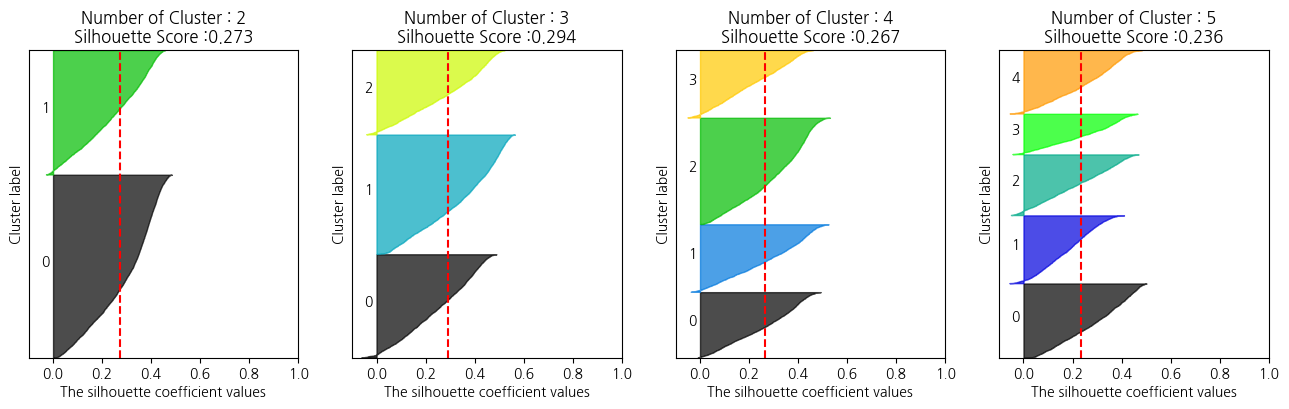

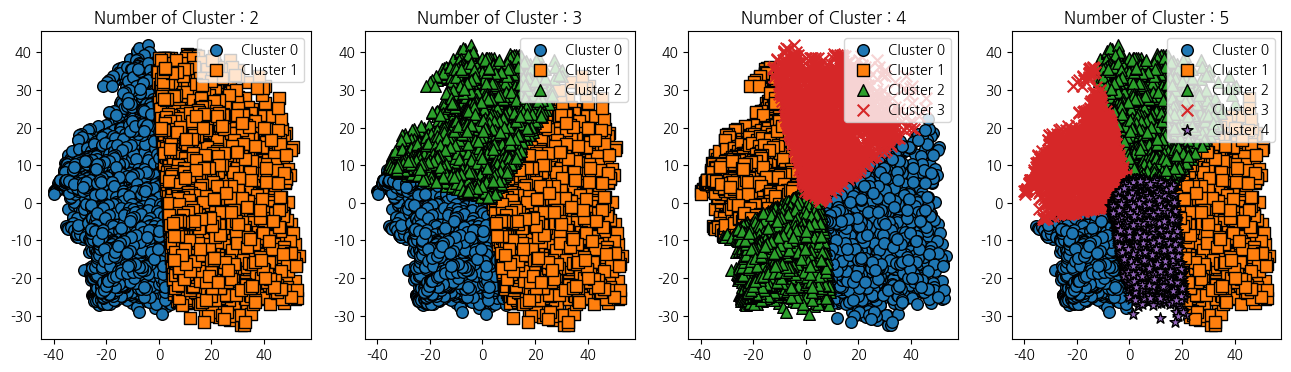

In [296]:
visualize_silhouette([2,3,4,5],X)
visualize_kmeans_plot_multi([2,3,4,5],X)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

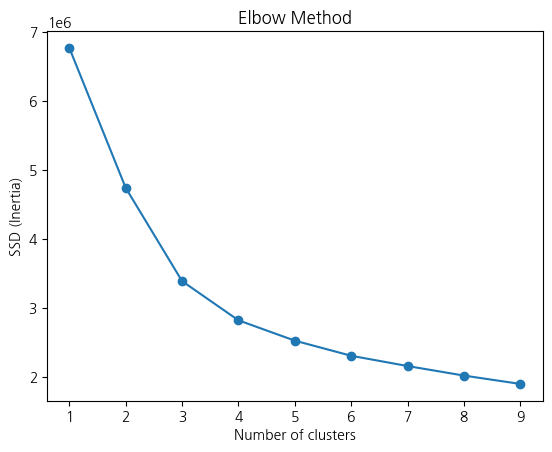

In [297]:
ssd = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 10), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD (Inertia)')
plt.show()

## DBSCAN

In [298]:
def visualize_silhouette_dbscan(eps_list, min_samples_list, X_features):
    from sklearn.cluster import DBSCAN
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np

    # eps와 min_samples 리스트의 길이가 동일해야 함을 확인
    if len(eps_list) != len(min_samples_list):
        raise ValueError("eps_list와 min_samples_list의 길이가 동일해야 합니다.")

    # 입력값으로 eps 값을 리스트로 받아서, 각 eps별로 DBSCAN 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(eps_list)

    # plt.subplots()으로 리스트에 기재된 eps 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 eps 값을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, (eps, min_samples) in enumerate(zip(eps_list, min_samples_list)):
        # DBSCAN 클러스터링 수행
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(X_features)

        # 잡음 데이터(레이블이 -1인 데이터)를 제외한 클러스터가 1개 이하이면 실루엣 스코어를 계산할 수 없음
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        
        if n_clusters > 1:
            sil_avg = silhouette_score(X_features, cluster_labels)
            sil_values = silhouette_samples(X_features, cluster_labels)

            y_lower = 10
            axs[ind].set_title(f'eps: {eps}, Clusters: {n_clusters}\nSilhouette Score: {round(sil_avg, 3)}')
            axs[ind].set_xlabel("The silhouette coefficient values")
            axs[ind].set_ylabel("Cluster label")
            axs[ind].set_xlim([-0.1, 1])
            axs[ind].set_ylim([0, len(X_features) + (n_clusters + 1) * 10])
            axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
            axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

            # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
            for i in set(cluster_labels):
                if i == -1:  # Noise는 따로 처리
                    continue
                ith_cluster_sil_values = sil_values[cluster_labels == i]
                ith_cluster_sil_values.sort()

                size_cluster_i = ith_cluster_sil_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                       facecolor=color, edgecolor=color, alpha=0.7)
                axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10

            axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        else:
            axs[ind].set_title(f'eps: {eps}\nNot enough clusters')
            axs[ind].set_xlabel("The silhouette coefficient values")
            axs[ind].set_ylabel("Cluster label")
            axs[ind].set_xlim([-0.1, 1])
            axs[ind].set_ylim([0, len(X_features) + 10])
            axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
            axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.tight_layout()
    plt.show()


In [299]:
def visualize_dbscan_plot_multi(eps_list, X_features, min_samples=5):
    from sklearn.cluster import DBSCAN
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # plt.subplots()으로 리스트에 기재된 DBSCAN eps 값만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(eps_list)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
    # 리스트에 기재된 eps 값들을 차례로 iteration 수행하면서 DBSCAN 클러스터링 수행하고 시각화
    for ind, eps in enumerate(eps_list):
        
        # DBSCAN 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels
        
        unique_labels = np.unique(cluster_labels)
        markers = ['o', 's', '^', 'x', '*', 'D', 'v', '<', '>', 'p', 'h']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            if label == -1:
                cluster_legend = 'Noise'
                marker = 'x'  # Noise는 'x'로 마커 설정
            else:
                cluster_legend = 'Cluster ' + str(label)
                marker = markers[label % len(markers)]  # 클러스터 마커 선택
                
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=marker, label=cluster_legend)
        
        axs[ind].set_title(f'DBSCAN eps: {eps}')    
        axs[ind].legend(loc='upper right')
    
    plt.show()


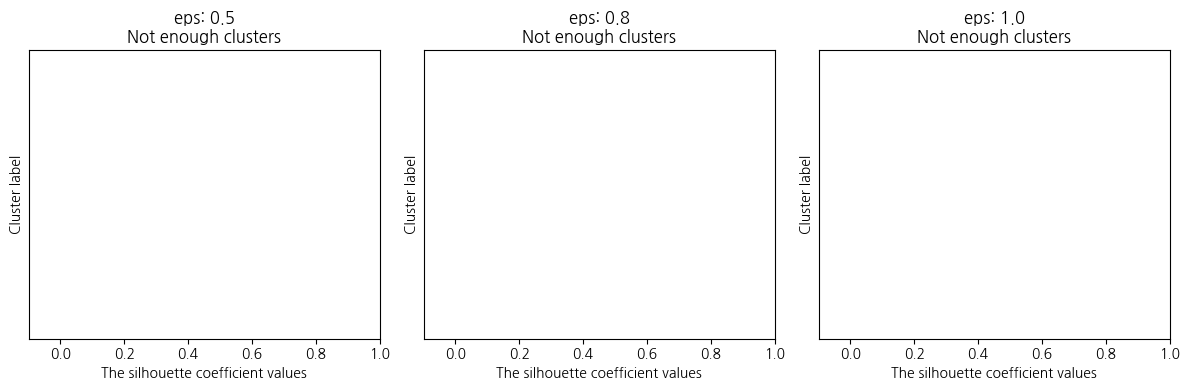

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1521536763.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1521536763.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/1521536763.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2']

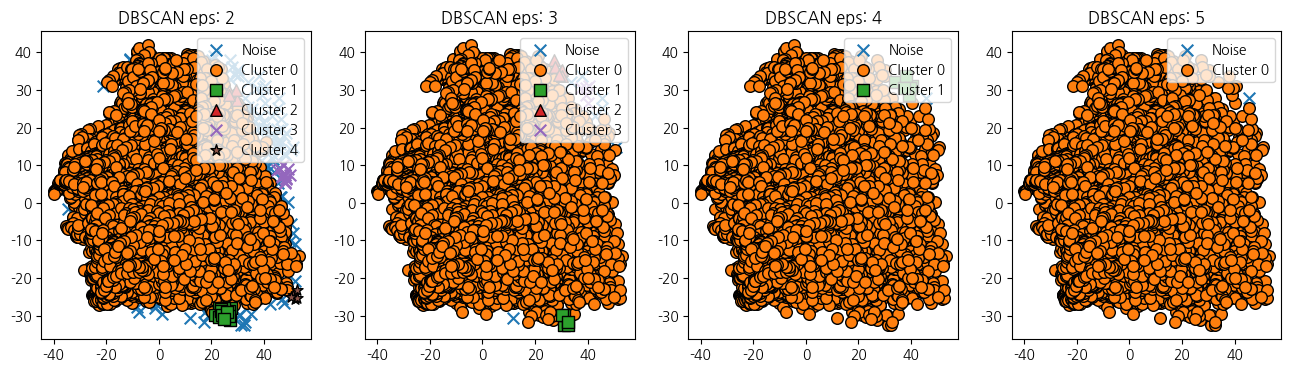

In [300]:
visualize_silhouette_dbscan([0.5, 0.8, 1.0], [2, 3, 4], X)
visualize_dbscan_plot_multi([2,3,4,5],X)

## gmm

In [301]:
def visualize_silhouette_gmm(cluster_lists, X_features): 
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # Gaussian Mixture Model 클러스터링 수행
        gmm = GaussianMixture(n_components=n_cluster, max_iter=500, random_state=0)
        cluster_labels = gmm.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg, 3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
    
    plt.tight_layout()
    plt.show()


In [302]:
def visualize_gmm_plot_multi(cluster_lists, X_features):
    from sklearn.mixture import GaussianMixture
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 GMM 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # GMM 클러스터링으로 클러스터링 결과를 dataframe에 저장
        gmm = GaussianMixture(n_components=n_cluster, random_state=0)
        cluster_labels = gmm.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels
        
        unique_labels = np.unique(cluster_labels)
        markers = ['o', 's', '^', 'x', '*', 'D', 'v', '<', '>', 'p', 'h']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            cluster_legend = 'Cluster ' + str(label)
            marker = markers[label % len(markers)]
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
                             edgecolor='k', marker=marker, label=cluster_legend)
        
        axs[ind].set_title(f'GMM Number of Cluster: {n_cluster}')
        axs[ind].legend(loc='upper right')
    
    plt.show()


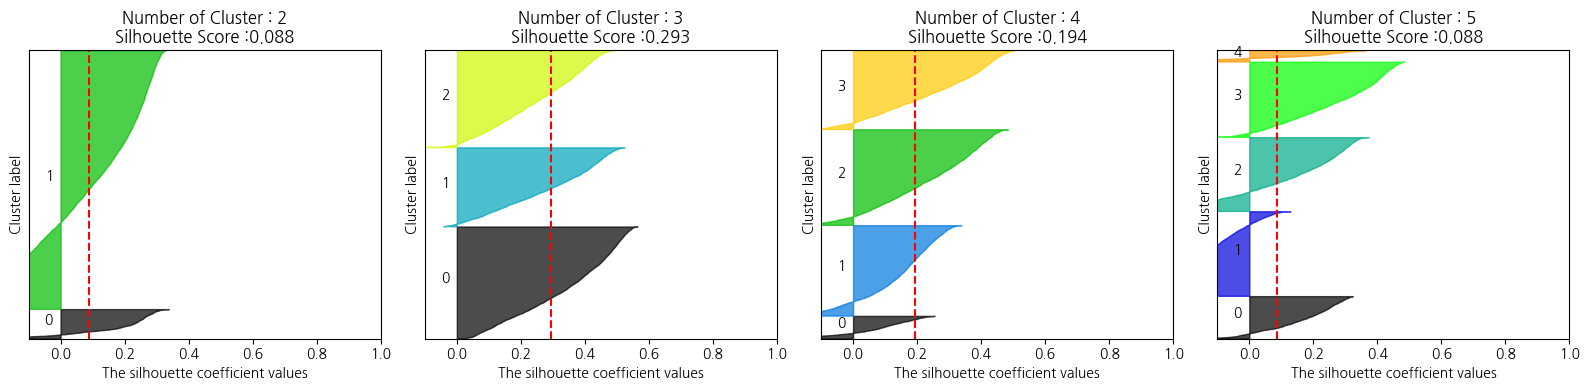

/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/3748860778.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,
/var/folders/xg/fp1_kg411bl0yfm4mg9jjycm0000gn/T/ipykernel_2725/3748860778.py:33: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,


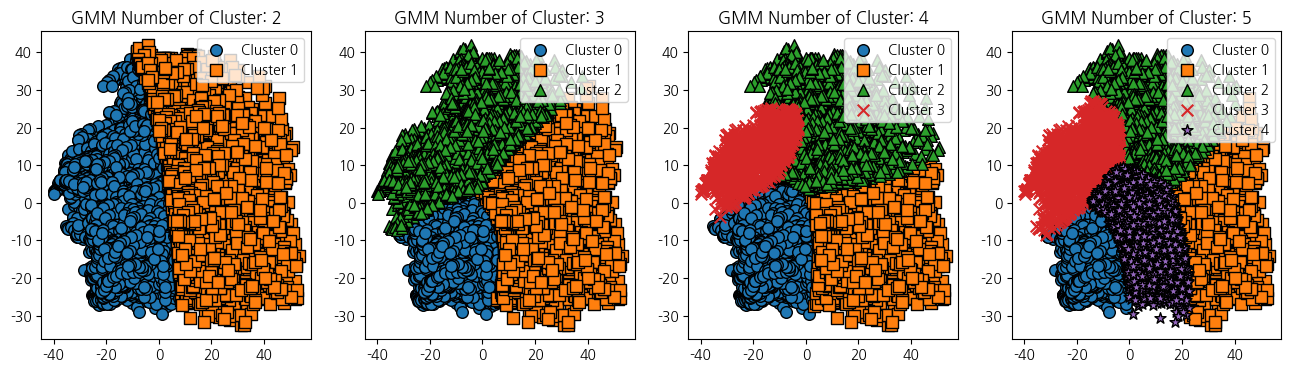

In [303]:
visualize_silhouette_gmm([2,3,4,5],X)
visualize_gmm_plot_multi([2,3,4,5],X)

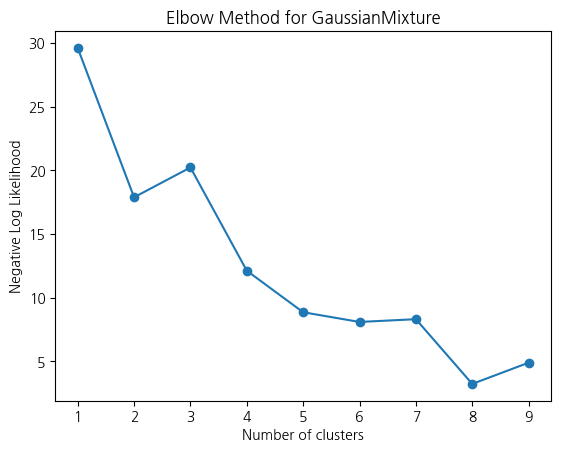

In [304]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

log_likelihoods = []

for k in range(1, 10):
    gmm = GaussianMixture(n_components=k, random_state=0).fit(X)
    # log-likelihood 값을 저장. 음수이므로 양수로 바꿔서 append.
    log_likelihoods.append(-gmm.score(X).sum())

plt.plot(range(1, 10), log_likelihoods, marker='o')
plt.title('Elbow Method for GaussianMixture')
plt.xlabel('Number of clusters')
plt.ylabel('Negative Log Likelihood')
plt.show()


In [305]:
def visualize_gmm_2d(X_features):
    
    from sklearn.mixture import GaussianMixture
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    
    # PCA를 사용하여 2차원 데이터로 변환
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])
    
    # 클러스터 개수를 3으로 설정하고 GMM 클러스터링 수행
    gmm = GaussianMixture(n_components=3, random_state=0)
    cluster_labels = gmm.fit_predict(pca_transformed)
    dataframe['cluster'] = cluster_labels
    
    unique_labels = np.unique(cluster_labels)
    markers = ['o', 's', '^', 'x', '*']
    
    # 2D scatter plot 생성
    plt.figure(figsize=(8, 6))
    
    # 각 클러스터에 대해 scatter plot으로 시각화
    for label in unique_labels:
        label_df = dataframe[dataframe['cluster'] == label]
        plt.scatter(label_df['PCA1'], label_df['PCA2'], 
                    s=70, edgecolor='k', marker=markers[label % len(markers)], label=f'Cluster {label}')
    
    plt.title('GMM 클러스터 3')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(loc='upper right')
    
    plt.show()


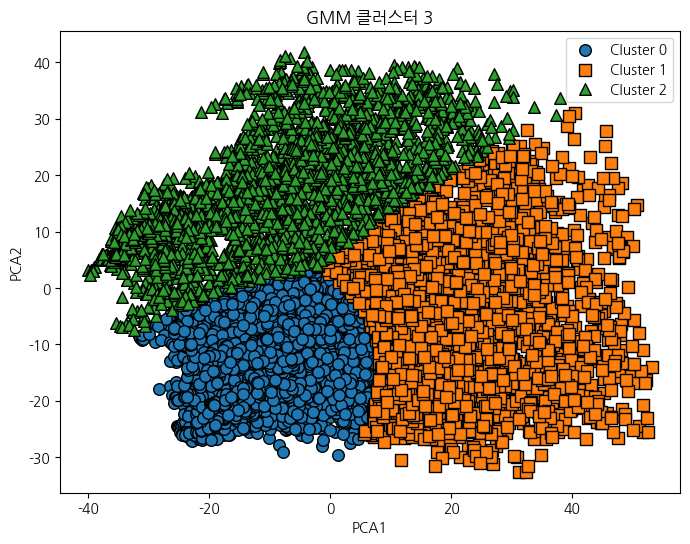

In [306]:
visualize_gmm_2d(X)

In [307]:
def visualize_gmm_3d(X_features):
    from sklearn.mixture import GaussianMixture
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # 3D 그래프를 그리기 위한 모듈
    
    # PCA를 사용하여 3차원 데이터로 변환
    pca = PCA(n_components=3)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2', 'PCA3'])
    
    # 클러스터 개수를 3으로 설정하고 GMM 클러스터링 수행
    gmm = GaussianMixture(n_components=3, random_state=0)
    cluster_labels = gmm.fit_predict(pca_transformed)
    dataframe['cluster'] = cluster_labels
    
    unique_labels = np.unique(cluster_labels)
    markers = ['o', 's', '^', 'x', '*']
    
    # 3D scatter plot 생성
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 각 클러스터에 대해 scatter plot으로 시각화
    for label in unique_labels:
        label_df = dataframe[dataframe['cluster'] == label]
        ax.scatter(label_df['PCA1'], label_df['PCA2'], label_df['PCA3'],
                   s=70, edgecolor='k', marker=markers[label % len(markers)], label=f'Cluster {label}')
    
    ax.set_title('GMM 클러스터 3')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.legend(loc='upper right')
    
    plt.show()

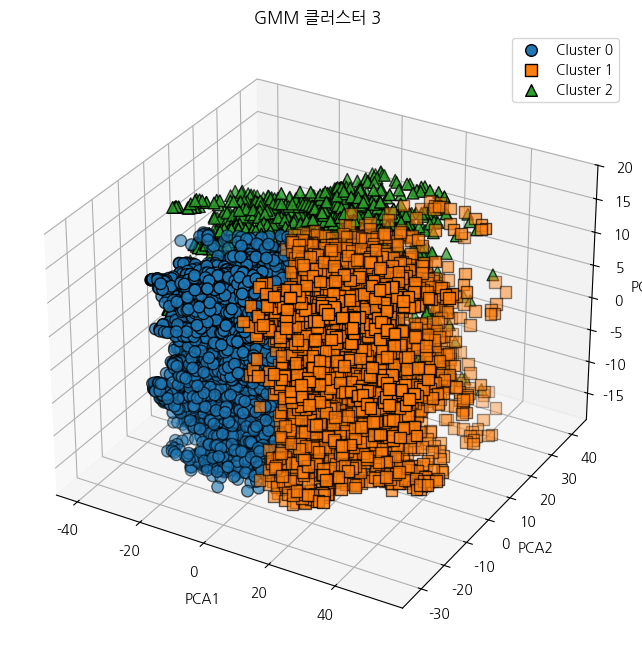

In [308]:
visualize_gmm_3d(X)

In [309]:
# 각 클러스터에 속한 데이터를 나눕니다.
cluster_0_data = X[X['cluster_label'] == 0]
cluster_1_data = X[X['cluster_label'] == 1]
cluster_2_data = X[X['cluster_label'] == 2]

# 각 클러스터의 평균을 계산하여 데이터프레임으로 저장합니다.
cluster_0_mean = cluster_0_data.mean().to_frame(name='Cluster 0 평균')
cluster_1_mean = cluster_1_data.mean().to_frame(name='Cluster 1 평균')
cluster_2_mean = cluster_2_data.mean().to_frame(name='Cluster 2 평균')


# 세 개의 클러스터 평균값을 하나의 데이터프레임으로 합칩니다.
cluster_mean_df = pd.concat([cluster_0_mean, cluster_1_mean, cluster_2_mean], axis=1)

# 결과 출력
cluster_mean_df

Cluster 0 평균  Cluster 1 평균  Cluster 2 평균
기온(°C)            19.556261      2.826431     23.348622
습도(%)             82.550600     62.864373     50.235008
지면온도(°C)          19.438879      2.373801     29.386994
미세먼지               0.332762      0.553755      0.696110
년               2023.273871   2023.622230   2023.528363
월                  7.232704      5.654648      6.387763
일                 16.666095     15.260337     15.040924
시간                 9.779874     10.821700     14.669368
요일                 3.050314      3.006947      3.048622
구름                 1.862493      1.007608      1.150729
눈                  0.057747      0.227258      0.000000
비                  0.277873      0.019517      0.002431
공휴일                0.047456      0.047635      0.038088
주중                 0.655517      0.687397      0.675041
바람                 0.345054      0.557393      0.847650
계절                 1.278159      2.124380      0.885332
cluster_label      0.000000      1.000000      2.000000

In [310]:
X['cluster_label'].value_counts()

cluster_label
0    3498
1    3023
2    2468
Name: count, dtype: int64